In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [6]:
df = pd.read_csv("./breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Drop the id column as it does not tell us anything

In [7]:
df = df.drop(columns="id")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Check normality of variables

Use the shapiro-wilk test to check normality statistically. Can also create histograms and Q-Q plots if important (such as for non-normally distributed variables)

Plot the QQ-plots for each variable as a visual test prior to conducting statistical tests.

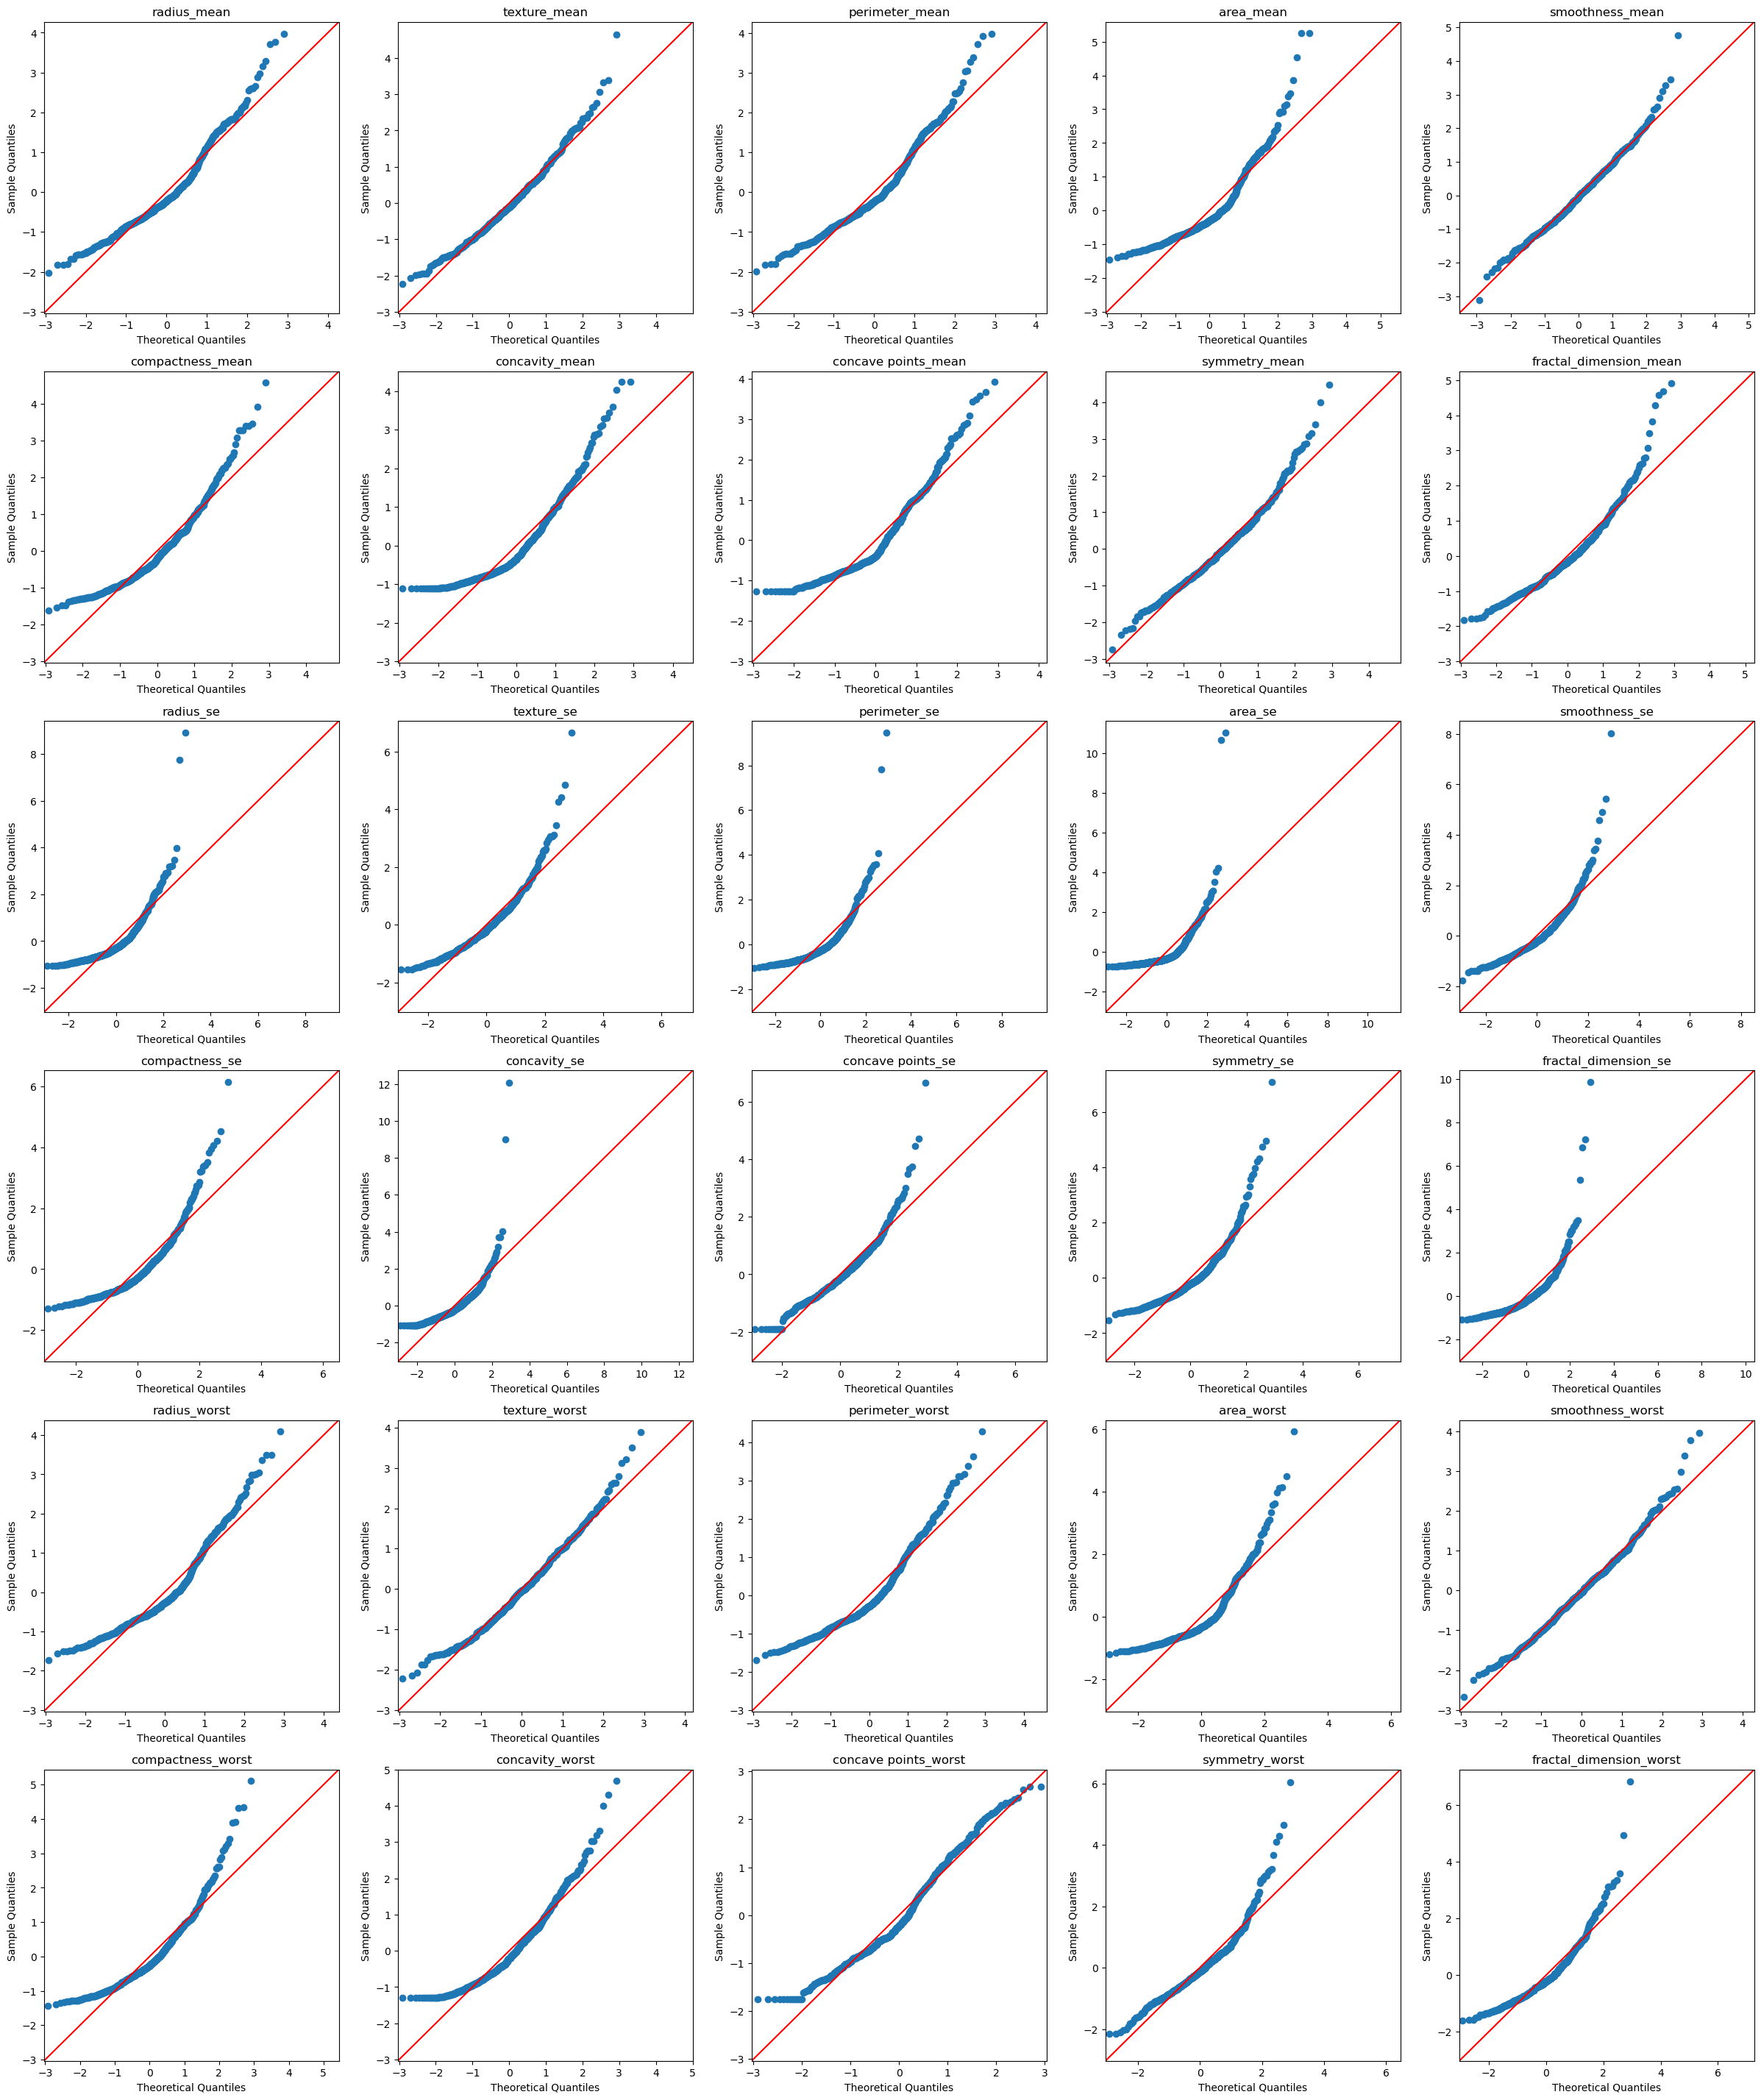

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

qqDf = df.iloc[:, 1:]
cols = qqDf.columns.to_list()

fig, ax = plt.subplots(6, 5, figsize = (30, 36))
ax = ax.ravel()
for i in range(0, 30):
    sm.qqplot(data=qqDf.iloc[:, i], line='45', fit=True, dist=stats.norm, ax=ax[i])
    ax[i].set_title(f'{cols[i]}')

plt.show()

In [9]:
from scipy.stats import shapiro

sw_res = df.loc[:, 'radius_mean':].apply(shapiro, axis = 0)
sw_res = sw_res.rename(index={0: "Shapiro-Wilk statistic", 1: "P-value"})
sw_res

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Shapiro-Wilk statistic,9.410696e-01,9.767201e-01,9.361826e-01,8.584018e-01,0.987487,9.169785e-01,8.668309e-01,8.916499e-01,9.725881e-01,9.232837e-01,...,9.134926e-01,0.982562,9.125851e-01,8.160705e-01,0.98862,8.910646e-01,9.175271e-01,9.648364e-01,9.161444e-01,8.895459e-01
P-value,3.106155e-14,7.281474e-08,7.011630e-15,3.196511e-22,0.000086,3.967941e-17,1.338583e-21,1.404436e-19,7.881996e-09,1.956494e-16,...,1.704317e-17,0.000003,1.373282e-17,5.595767e-25,0.00021,1.247598e-19,4.542876e-17,1.985903e-10,3.234118e-17,9.195530e-20


If the Shapiro-Wilk test p-value is less than 0.05 the data is not normally distributed. Therefore, we need to use Spearman Rank Correlation Coefficient instead of Pearson correlation coefficient

In [10]:
df[sw_res.columns[sw_res.iloc[1,:] < 0.05]]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


All columns are not normally distributed.

# Test heteroscedasticity using White test

In [11]:
import scipy.stats as stats

m_df = df.loc[df['diagnosis'] == 'M', :]
b_df = df.loc[df['diagnosis'] == 'B', :]

stat, p = stats.levene(m_df.loc[:, 'radius_mean'], b_df.loc[:, 'radius_mean'], center='median')
p

5.279775501703329e-20

# Test correlation with diagnosis using Kruskal-Wallis Test

Observations are not paired (ie,, there is only one observation per patient), therefore we use Kurskal-Wallis over Mann-Whitney U test.

In [12]:
import scipy.stats as stats

m_df = df.loc[df['diagnosis'] == 'M', :]
b_df = df.loc[df['diagnosis'] == 'B', :]

cols = df.loc[:, 'radius_mean':].columns.to_list()

res = pd.DataFrame(0, index=['Statistic', 'p-value'], columns=cols)

for c in cols:
    stat, pvalue = stats.kruskal(m_df.loc[:, c], b_df.loc[:, c])
    res.loc['Statistic', c] = stat
    res.loc['p-value', c] = pvalue
    
res.loc['p-value', :] < 0.05

radius_mean                 True
texture_mean                True
perimeter_mean              True
area_mean                   True
smoothness_mean             True
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean               True
fractal_dimension_mean     False
radius_se                   True
texture_se                 False
perimeter_se                True
area_se                     True
smoothness_se              False
compactness_se              True
concavity_se                True
concave points_se           True
symmetry_se                 True
fractal_dimension_se        True
radius_worst                True
texture_worst               True
perimeter_worst             True
area_worst                  True
smoothness_worst            True
compactness_worst           True
concavity_worst             True
concave points_worst        True
symmetry_worst              True
fractal_dimension_worst     True
Name: p-va

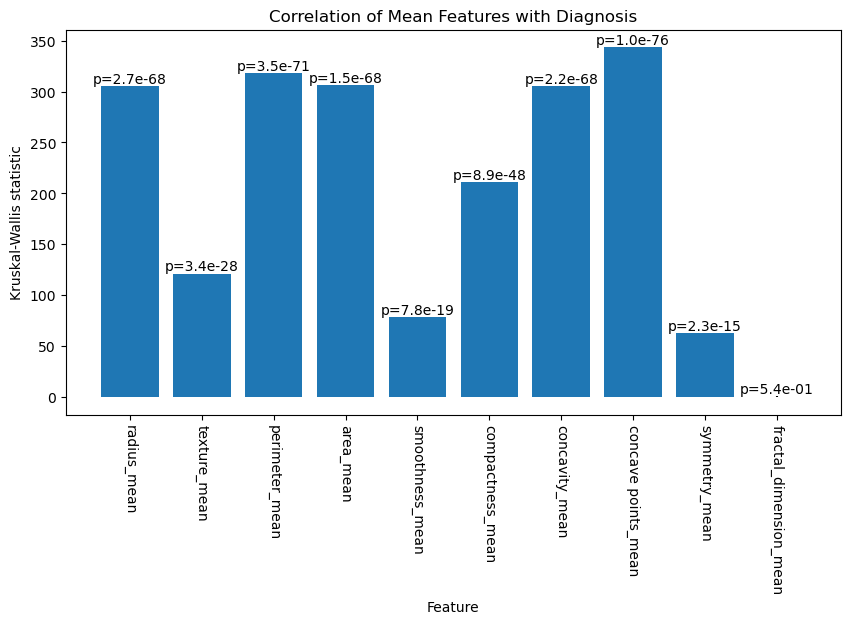

In [13]:
mean_cols = df.loc[:, 'radius_mean':'fractal_dimension_mean'].columns.to_list()
se_cols = df.loc[:, 'radius_se':'fractal_dimension_se'].columns.to_list()
worst_cols = df.loc[:, 'radius_worst':].columns.to_list()

ind = np.arange(len(mean_cols))

fig, ax = plt.subplots(figsize=(10,5))
p1 = ax.bar(x=ind, height=res.loc['Statistic', mean_cols], yerr=res.loc['p-value', mean_cols])
ax.set_xticks(ind, labels=mean_cols, rotation=-90)
ax.set_xlabel("Feature")
ax.set_ylabel("Kruskal-Wallis statistic")
ax.set_title('Correlation of Mean Features with Diagnosis')
ax.bar_label(p1, labels=['p=%.1e' % e for e in res.loc['p-value', mean_cols]])

plt.show()

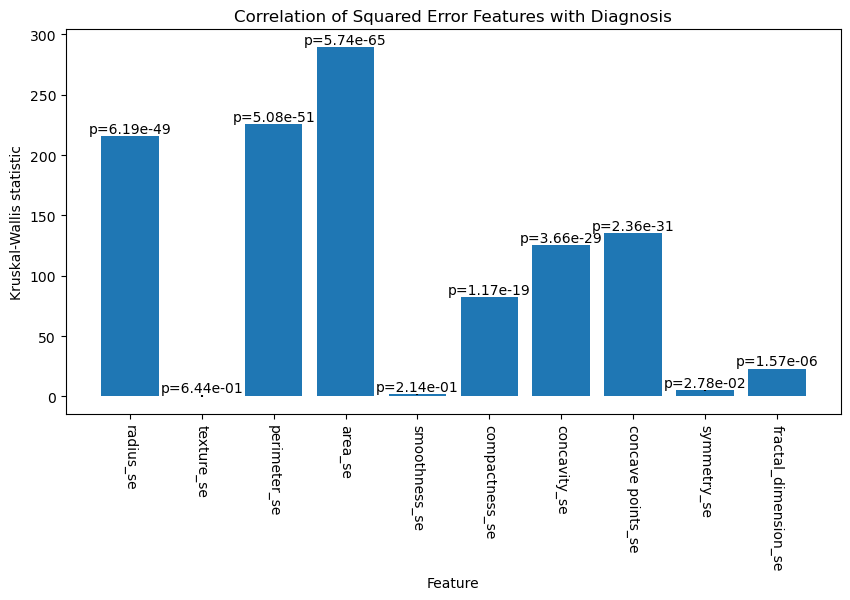

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
p1 = ax.bar(x=ind, height=res.loc['Statistic', se_cols], yerr=res.loc['p-value', se_cols])
ax.set_xticks(ind, labels=se_cols, rotation=-90)
ax.set_xlabel("Feature")
ax.set_ylabel("Kruskal-Wallis statistic")
ax.set_title('Correlation of Squared Error Features with Diagnosis')
ax.bar_label(p1, labels=['p=%.2e' % e for e in res.loc['p-value', se_cols]])

plt.show()

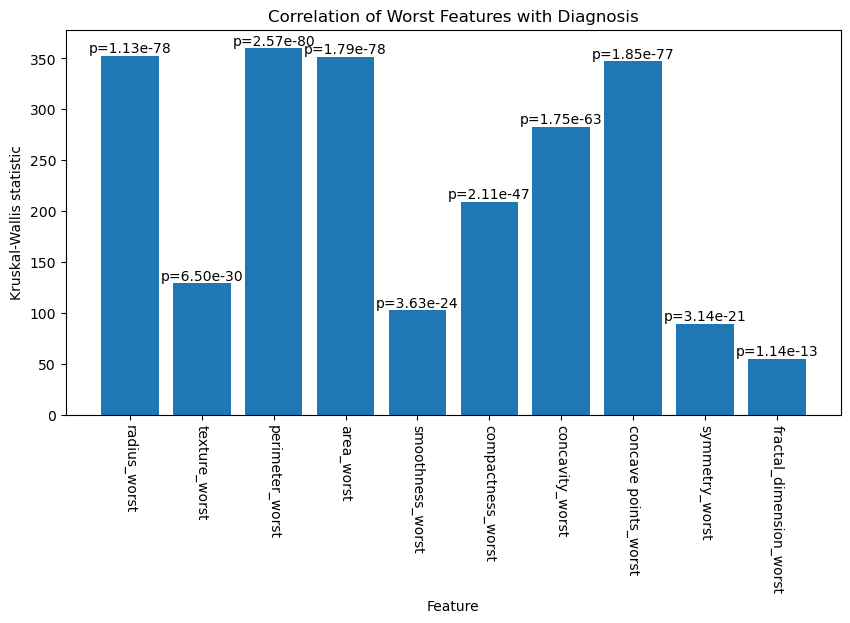

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
p1 = ax.bar(x=ind, height=res.loc['Statistic', worst_cols], yerr=res.loc['p-value', worst_cols])
ax.set_xticks(ind, labels=worst_cols, rotation=-90)
ax.set_xlabel("Feature")
ax.set_ylabel("Kruskal-Wallis statistic")
ax.set_title('Correlation of Worst Features with Diagnosis')
ax.bar_label(p1, labels=['p=%.2e' % e for e in res.loc['p-value', worst_cols]])

plt.show()

# Principal Component Analysis

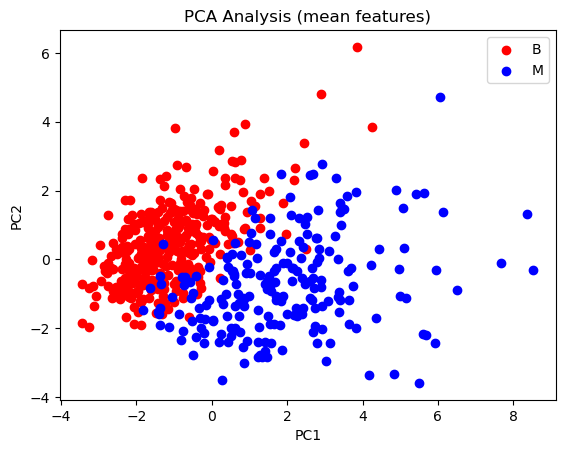

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_cols = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[list(y.index[y['diagnosis'] == j]), 0], X_pca[list(y.index[y['diagnosis'] == j]), 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA Analysis (mean features)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

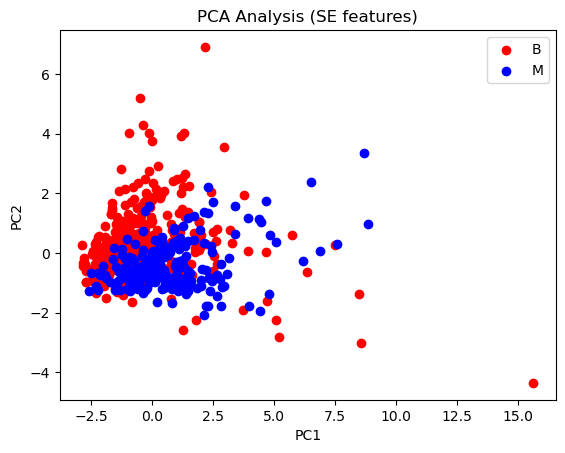

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_cols = ['radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[list(y.index[y['diagnosis'] == j]), 0], X_pca[list(y.index[y['diagnosis'] == j]), 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA Analysis (SE features)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

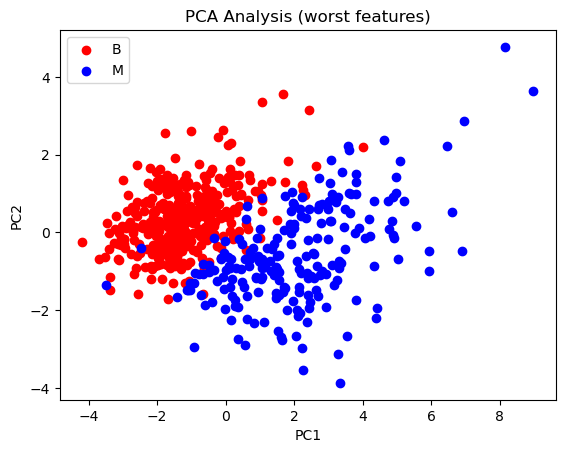

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_cols = ['radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[list(y.index[y['diagnosis'] == j]), 0], X_pca[list(y.index[y['diagnosis'] == j]), 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA Analysis (worst features)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

Check the number of principal components needed to explain variance (at a specific threshold)
- Thresholds: 95%/99%

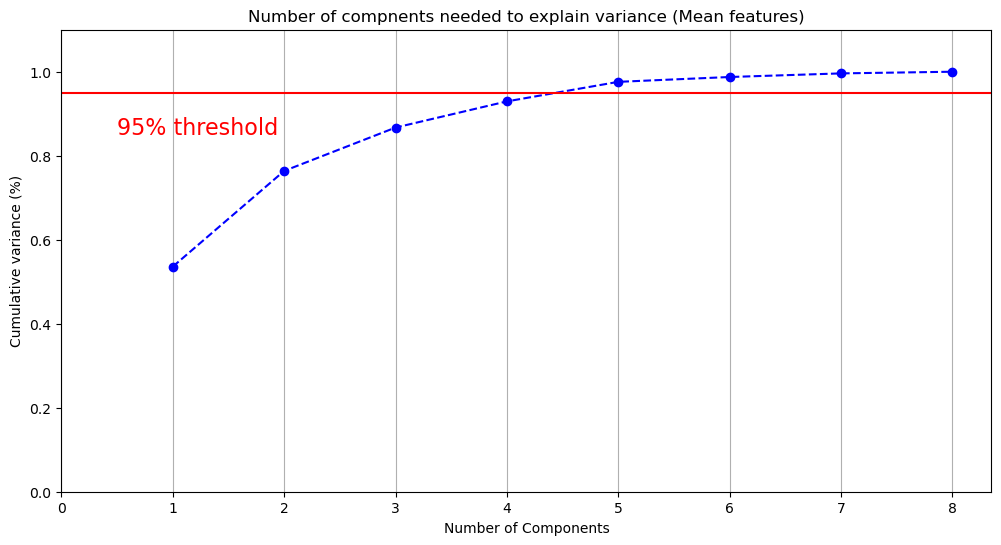

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_cols = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA().fit(X)

fig, ax = plt.subplots(figsize=(12,6))
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of compnents needed to explain variance (Mean features)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

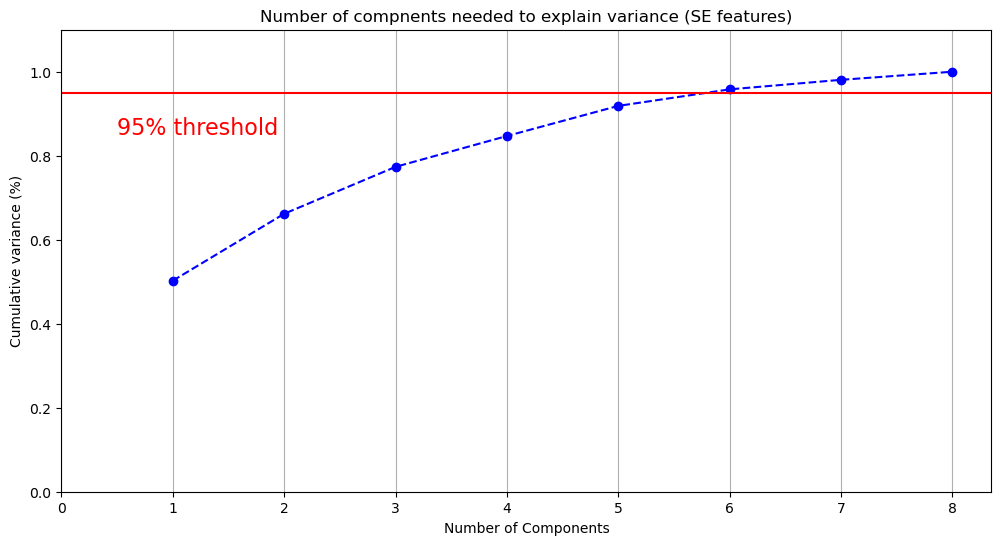

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_cols = ['radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA().fit(X)

fig, ax = plt.subplots(figsize=(12,6))
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of compnents needed to explain variance (SE features)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

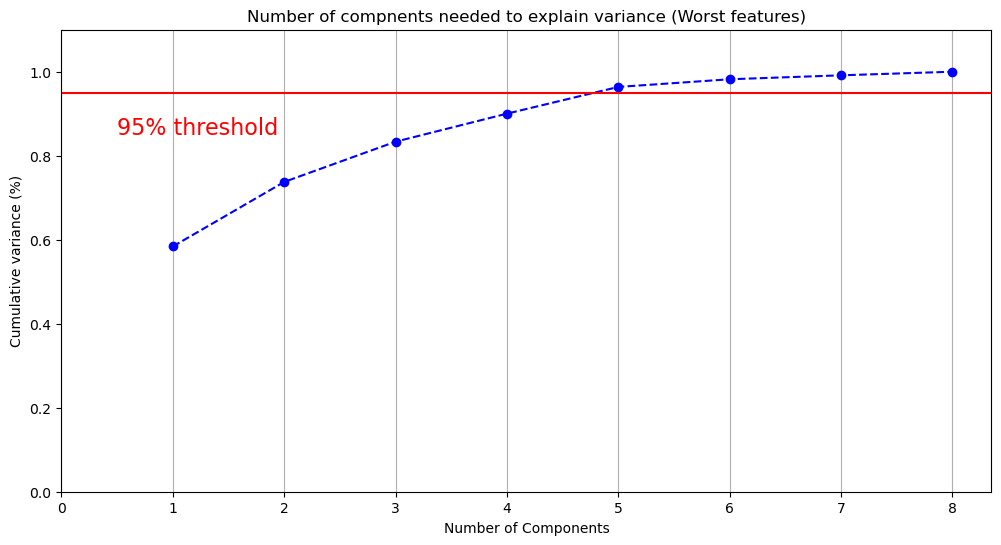

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_cols = ['radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA().fit(X)

fig, ax = plt.subplots(figsize=(12,6))
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of compnents needed to explain variance (Worst features)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

Utilize all columns from dataframe together and do PCA analysis

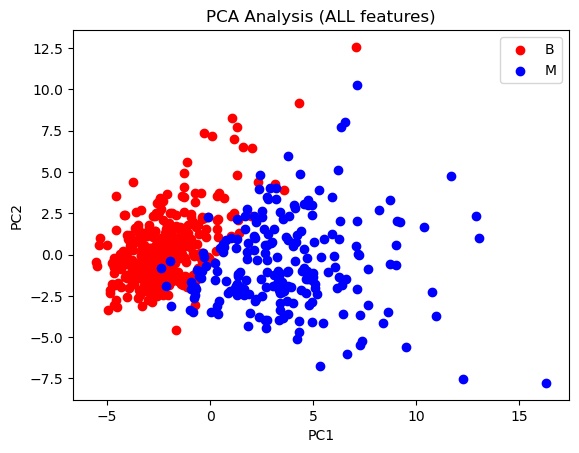

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y_col = ['diagnosis']

X = df.iloc[:, 1:]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[list(y.index[y['diagnosis'] == j]), 0], X_pca[list(y.index[y['diagnosis'] == j]), 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA Analysis (ALL features)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

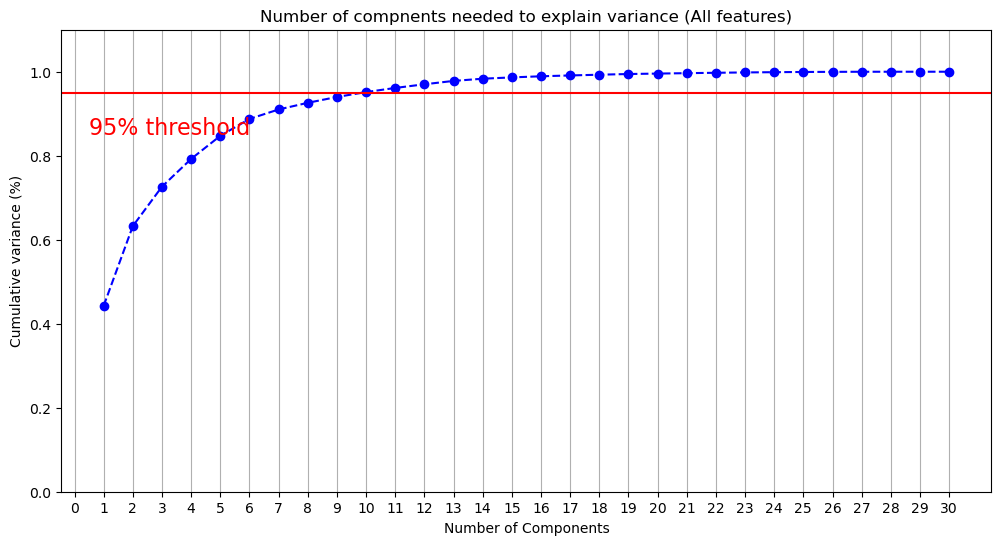

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

y_col = ['diagnosis']

X = df.iloc[:, 1:]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA().fit(X)

fig, ax = plt.subplots(figsize=(12,6))
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of compnents needed to explain variance (All features)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Create Dataframes for Analysis

1. Drop the redundant columns
    - perimeter and area
    - compactness and concave points

2. Generate PCA dimensionally reduced data

In [24]:
# Handling Class Imbalances
#Creating a dictionary using a for loop for class weights
target = df["diagnosis"]
target = target.replace({'B':0,'M':1})

class_weight = {}

for i in range(len(np.unique(target))):
    
    for x in [0.5]:                                                 
        class_weight[i] = x
        
print('Class Weights:')
print(class_weight)

Class Weights:
{0: 0.5, 1: 0.5}


In [25]:
from sklearn.model_selection import train_test_split
predictors = df.drop(['diagnosis'], axis = 1)
# Splitting training and testing set
train_inputs, test_inputs, train_targets, test_targets = train_test_split(predictors, target, test_size=0.25, random_state=42)

# Scaling the features
train_scaled = sc.fit_transform(train_inputs.astype(float, 64))
test_scaled = sc.transform(test_inputs.astype(float, 64))
test_scaled = pd.DataFrame(test_scaled, columns=train_inputs.columns)
train_scaled = pd.DataFrame(train_scaled, columns=test_inputs.columns)

# Feature selection for models effected by multicollinearity
train_scaled_fs = train_scaled.drop(['perimeter_mean', 'area_mean', 'compactness_mean', 'perimeter_se', 'area_se', 'compactness_se', 'perimeter_worst', 'area_worst', 'compactness_worst'], axis = 1)
test_scaled_fs = test_scaled.drop(['perimeter_mean', 'area_mean', 'compactness_mean', 'perimeter_se', 'area_se', 'compactness_se', 'perimeter_worst', 'area_worst', 'compactness_worst'], axis = 1)

In [26]:
#PCA transformation and feature selection for models that require it
pca95 = PCA(n_components = 0.95)

train_pca = pca95.fit_transform(train_scaled)
test_pca = pca95.transform(test_scaled)

train_pca = pd.DataFrame(train_pca)
train_pca.rename(columns=lambda x: "PC " + str(x + 1), inplace=True)

test_pca = pd.DataFrame(test_pca)
test_pca.rename(columns=lambda x: "PC " + str(x + 1), inplace=True)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

def results(pred, true, test_str, title_str):
    classes = ['M', 'B']
    
    print(test_str, round(accuracy_score(true, pred), 3))

    # Calculating confusion matrix, sensitivity, and specificity
    cm = confusion_matrix(true, pred)

    tn, fp, fn, tp = confusion_matrix(true, pred).ravel()
    print("Sensitivity: ", (tp / (tp + fn)))
    print("Specificity: ", (tn / (tn + fp)))

    # Plotting confusion matrix
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g') 
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True') 
    ax.set_title(title_str) 
    ax.xaxis.set_ticklabels(classes) 
    ax.yaxis.set_ticklabels(classes, rotation=360)

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

def cross_validation(model, features, labels, folds=5):
     scores = ['accuracy', 'precision', 'recall', 'f1']
     results = cross_validate(estimator=model,
                               X= features,
                               y= labels,
                               cv= folds,
                               scoring=scores,
                               return_train_score=True)
      
     return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }
        
def plot_result(x_label, y_label, plot_title, train_results, val_results):
        # x_label = Model name (eg. "Logistic Regression")
        # y_label = Metric (eg. "Accuracy")
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_results, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_results, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=20)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

## Logistic Regression (No PCA)

{'C': 1, 'class_weight': {0: 0.5, 1: 0.5}, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Logistic Regression (non-PCA) accuracy: 0.979
Sensitivity:  0.9814814814814815
Specificity:  0.9775280898876404


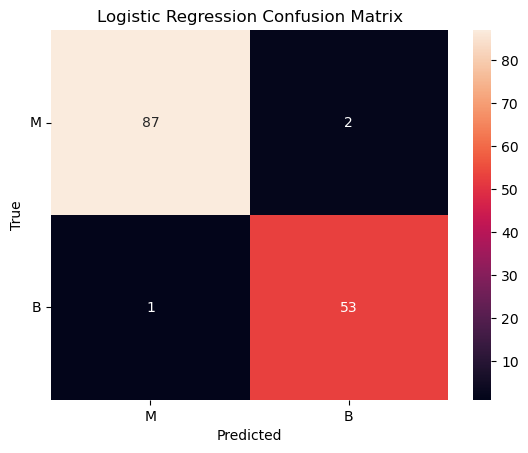

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Hyperparameters search grid 
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10], 
                 'penalty': ['l1', 'l2']}

log_estimator = LogisticRegression(solver='liblinear', class_weight=class_weight, random_state=42)
# Finding optimal hyperparameters and fitting model
log_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=log_grid, 
                  cv=3,
                  scoring='accuracy')

log_model.fit(train_scaled_fs, train_targets)
best_log = log_model.best_estimator_
print(best_log.get_params())
log_pred = best_log.predict(test_scaled_fs)

results(log_pred, test_targets, "Logistic Regression (non-PCA) accuracy:", "Logistic Regression Confusion Matrix")

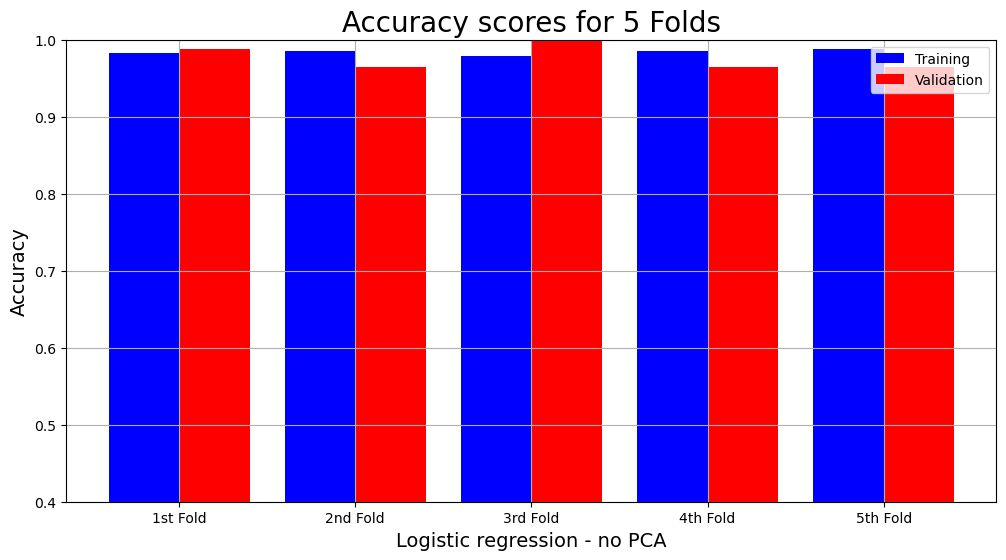

In [30]:
log_model_cv = cross_validation(best_log, train_scaled_fs, train_targets)
plot_result("Logistic regression - no PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            log_model_cv["Training Accuracy scores"],
            log_model_cv["Validation Accuracy scores"])

## Logistic Regression (with PCA 95% variance)

Logistic Regression (PCA) accuracy: 0.993
Sensitivity:  0.9814814814814815
Specificity:  1.0


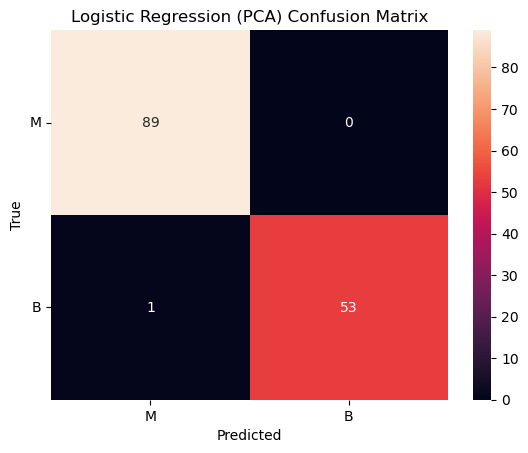

In [31]:
# Finding optimal hyperparameters and fitting model
log_pca_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=log_grid, 
                  cv=3,
                  scoring='accuracy')

log_pca_model.fit(train_pca, train_targets)
best_log_pca = log_pca_model.best_estimator_
log_pca_pred = best_log_pca.predict(test_pca)

results(log_pca_pred, test_targets, "Logistic Regression (PCA) accuracy:", "Logistic Regression (PCA) Confusion Matrix")

In [32]:
log_pca_model_cv = cross_validation(best_log_pca, train_pca, train_targets)
print(log_pca_model_cv)

{'Training Accuracy scores': array([0.97058824, 0.97947214, 0.96774194, 0.97653959, 0.97947214]), 'Mean Training Accuracy': 97.47628083491462, 'Training Precision scores': array([0.98333333, 0.97619048, 0.96774194, 0.98360656, 0.99173554]), 'Mean Training Precision': 0.9805215679149626, 'Training Recall scores': array([0.93650794, 0.96850394, 0.94488189, 0.95238095, 0.95238095]), 'Mean Training Recall': 0.950931133608299, 'Training F1 scores': array([0.95934959, 0.97233202, 0.9561753 , 0.96774194, 0.97165992]), 'Mean Training F1 Score': 0.9654517525246409, 'Validation Accuracy scores': array([0.98837209, 0.96470588, 0.98823529, 0.94117647, 0.97647059]), 'Mean Validation Accuracy': 97.17920656634747, 'Validation Precision scores': array([0.96969697, 1.        , 1.        , 0.96551724, 0.96875   ]), 'Mean Validation Precision': 0.9807928422152561, 'Validation Recall scores': array([1.        , 0.90322581, 0.96774194, 0.875     , 0.96875   ]), 'Mean Validation Recall': 0.9429435483870968,

## SVC (No PCA)

Support Vector Classifier (non-PCA) accuracy: 0.972
Sensitivity:  0.9629629629629629
Specificity:  0.9775280898876404


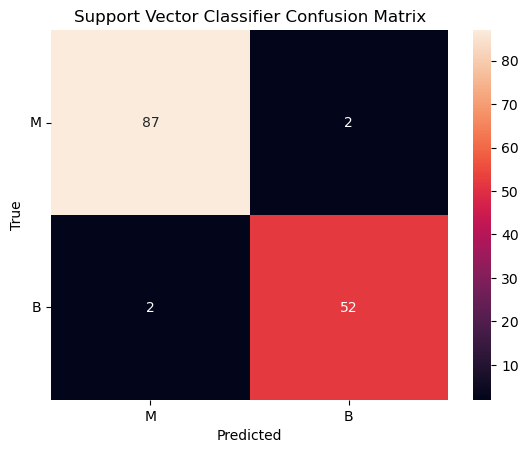

In [77]:
from sklearn.svm import SVC

svc_param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svc_model = GridSearchCV(SVC(), svc_param_grid, refit = True)
svc_model.fit(train_scaled_fs, train_targets)
best_svc = svc_model.best_estimator_
svc_pred = best_svc.predict(test_scaled_fs)

results(svc_pred, test_targets, "Support Vector Classifier (non-PCA) accuracy:", "Support Vector Classifier Confusion Matrix")

Support Vector Classifier (PCA) accuracy: 0.993
Sensitivity:  0.9814814814814815
Specificity:  1.0


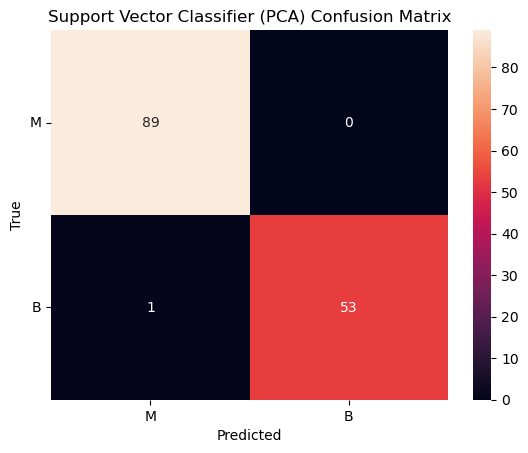

In [34]:
svc_pca_model = GridSearchCV(SVC(), svc_param_grid, refit = True)
svc_pca_model.fit(train_pca, train_targets)
best_svc_pca = svc_pca_model.best_estimator_
svc_pca_pred = best_svc_pca.predict(test_pca)

results(svc_pca_pred, test_targets, "Support Vector Classifier (PCA) accuracy:", "Support Vector Classifier (PCA) Confusion Matrix")

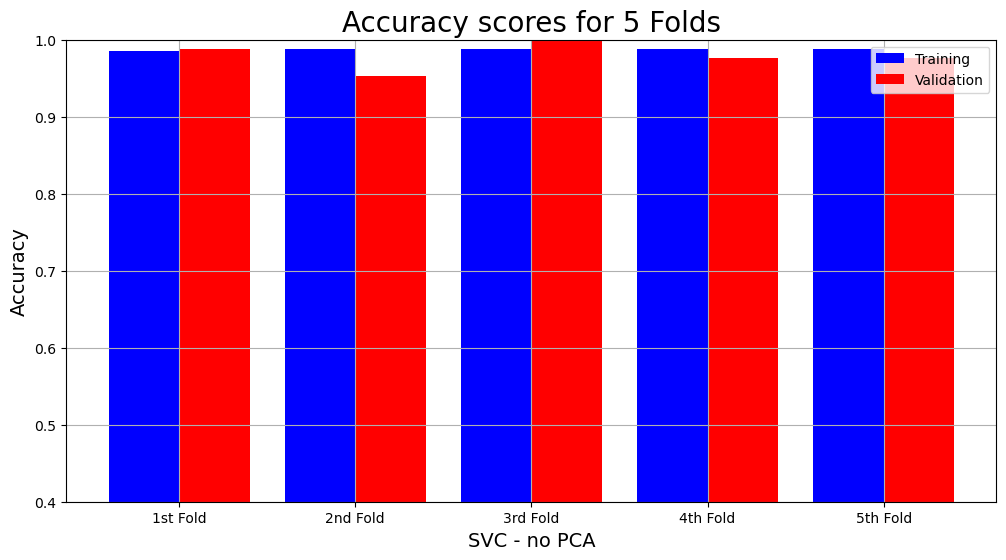

In [35]:
svc_model_cv = cross_validation(best_svc, train_scaled_fs, train_targets)
plot_result("SVC - no PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            svc_model_cv["Training Accuracy scores"],
            svc_model_cv["Validation Accuracy scores"])

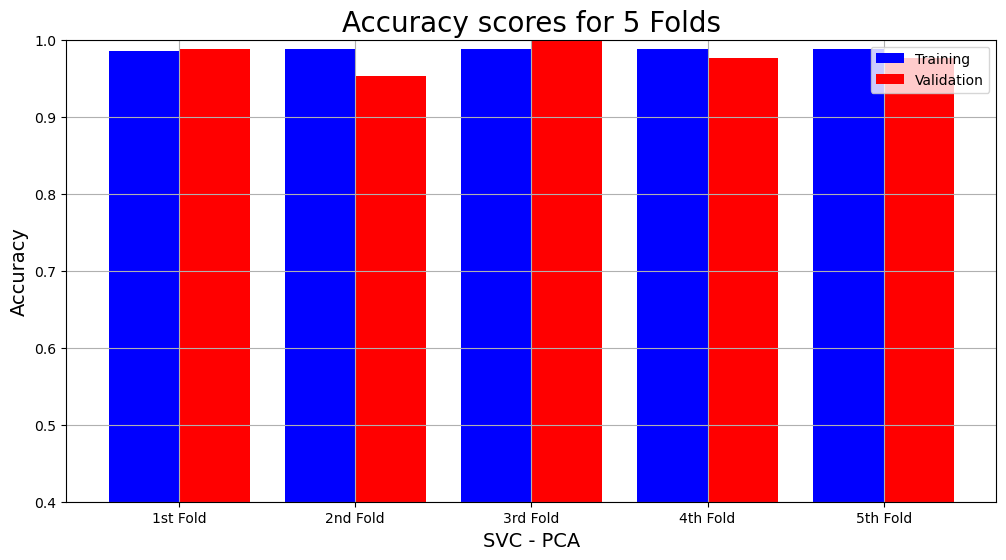

In [36]:
svc_pca_model_cv = cross_validation(best_svc_pca, train_pca, train_targets)
plot_result("SVC - PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            svc_model_cv["Training Accuracy scores"],
            svc_model_cv["Validation Accuracy scores"])

# Decision Tree (No PCA)

Best Criterion: entropy
Best max_depth: 4
Best class weighting: None
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


Decision tree (non-PCA) accuracy: 0.965
Sensitivity:  0.9444444444444444
Specificity:  0.9775280898876404


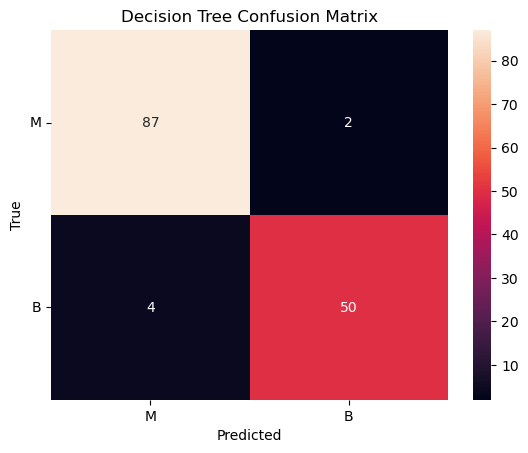

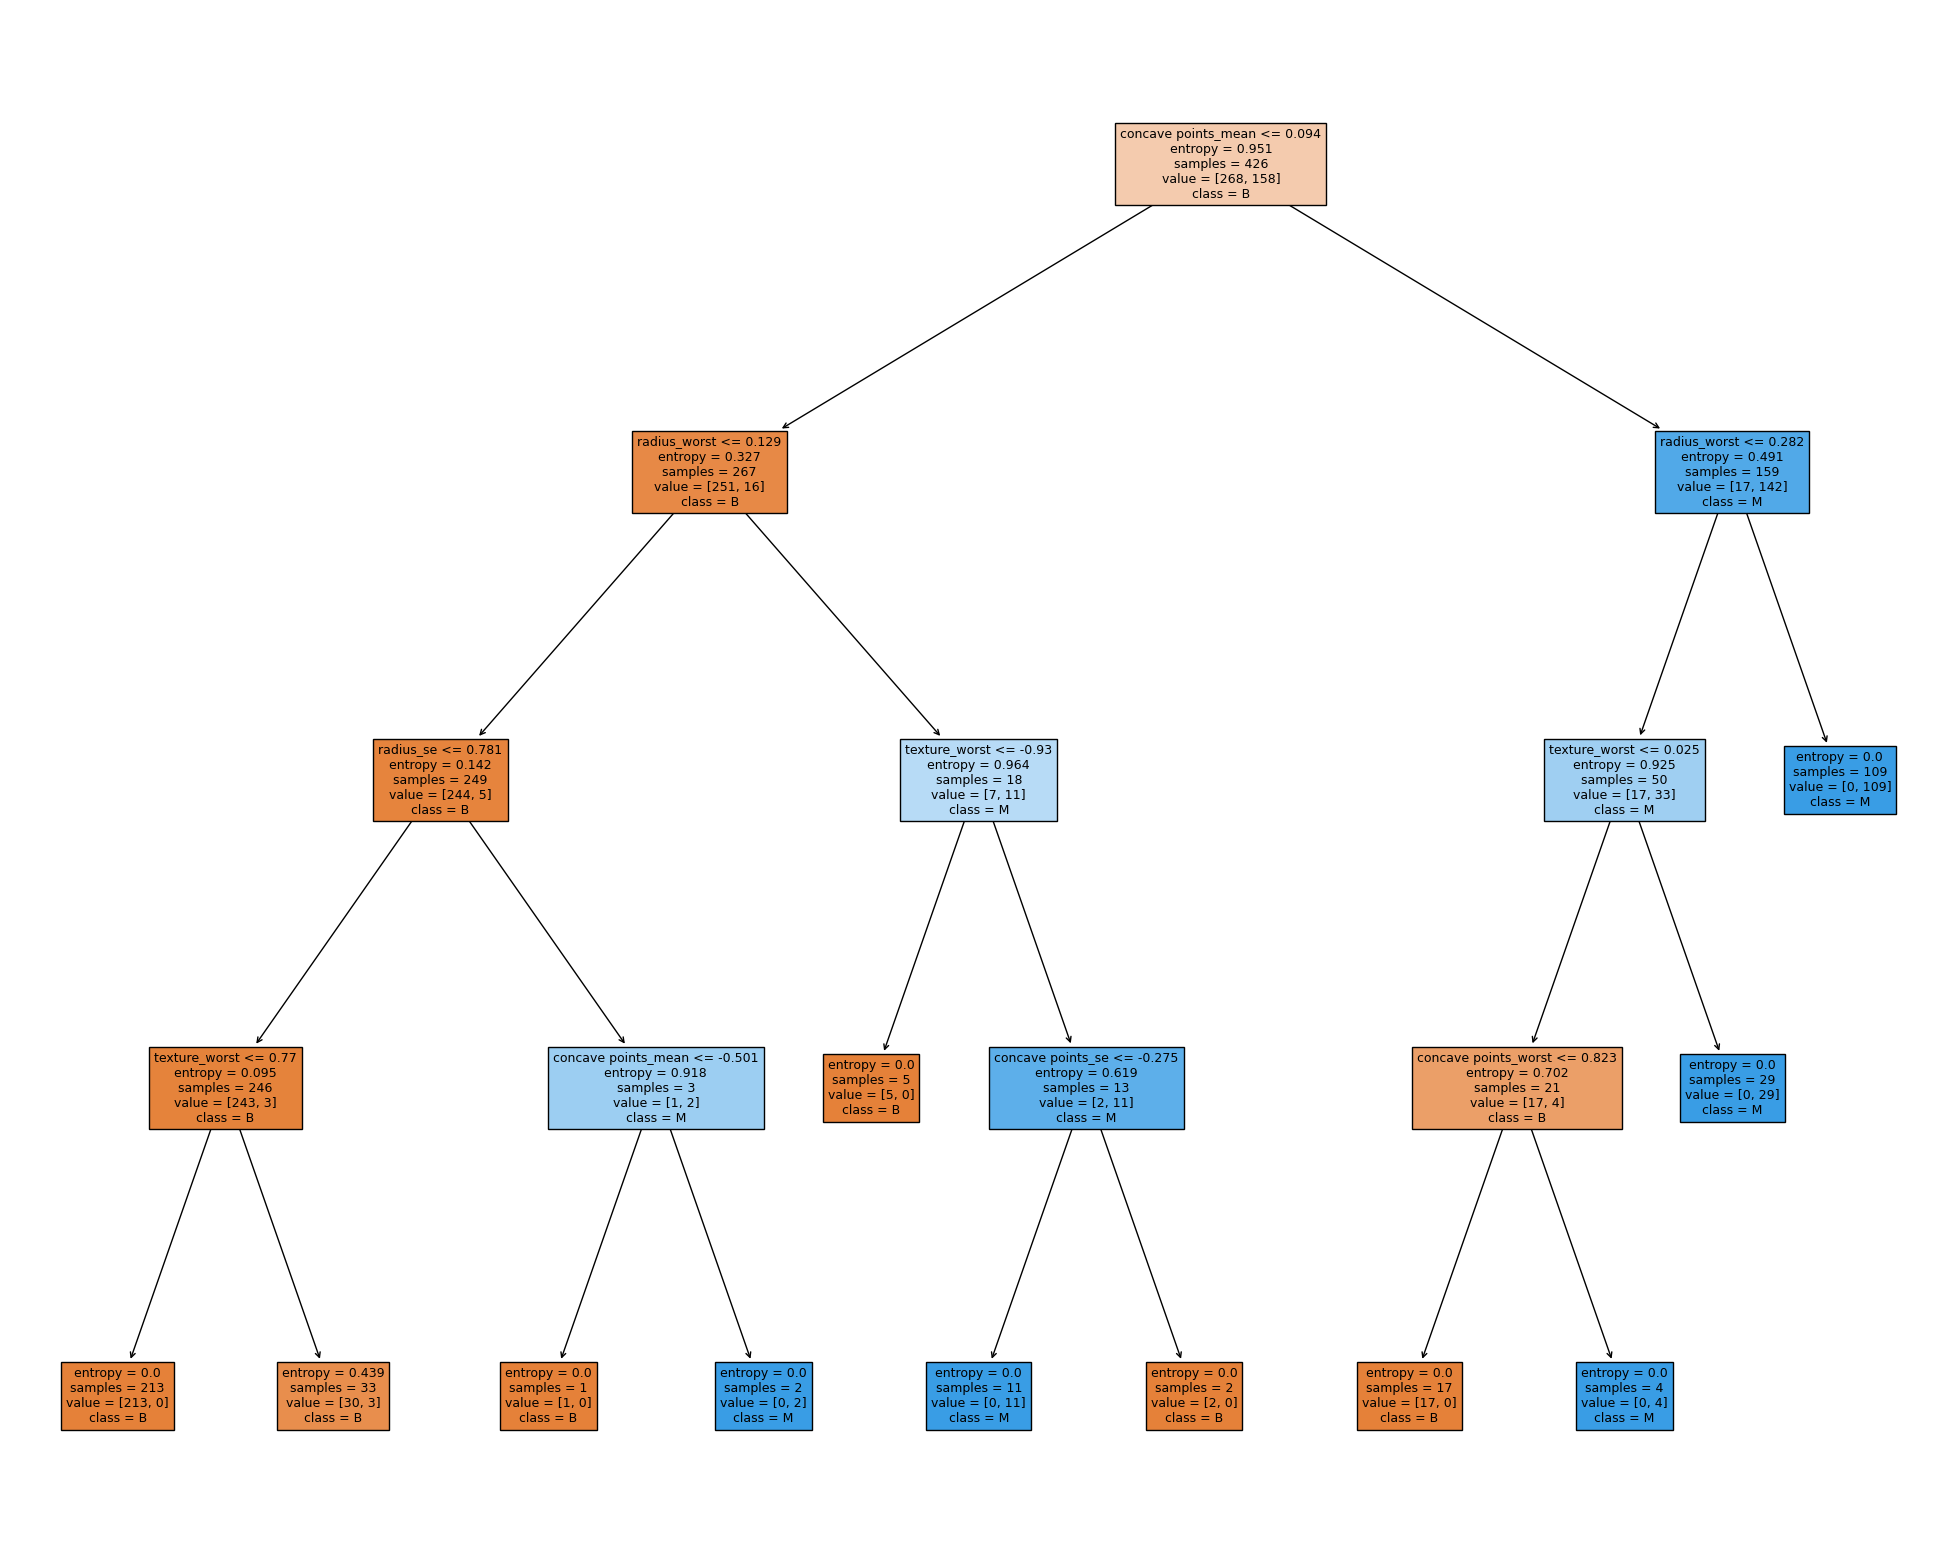

In [37]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

random_state = 0

dt = tree.DecisionTreeClassifier(random_state=random_state)

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12,14]
class_weight = [None, 'balanced']

parameters = dict(criterion=criterion,
                  max_depth=max_depth,
                  class_weight=class_weight)

clf_GS = GridSearchCV(dt, parameters)
clf_GS.fit(train_scaled_fs, train_targets)

print(f"Best Criterion: {clf_GS.best_estimator_.get_params()['criterion']}")
print(f"Best max_depth: {clf_GS.best_estimator_.get_params()['max_depth']}")
print(f"Best class weighting: {clf_GS.best_estimator_.get_params()['class_weight']}")
print(f"{clf_GS.best_estimator_.get_params()}")
print("\n")

clf_GS.score(train_scaled_fs, train_targets)
clf_GS.score(test_scaled_fs, test_targets)

test_pred = clf_GS.predict(test_scaled_fs)

results(test_pred, test_targets, "Decision tree (non-PCA) accuracy:", "Decision Tree Confusion Matrix")

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_GS.best_estimator_,
                    feature_names=train_scaled_fs.columns.tolist(),
                    class_names=['B', 'M'],
                    filled=True)

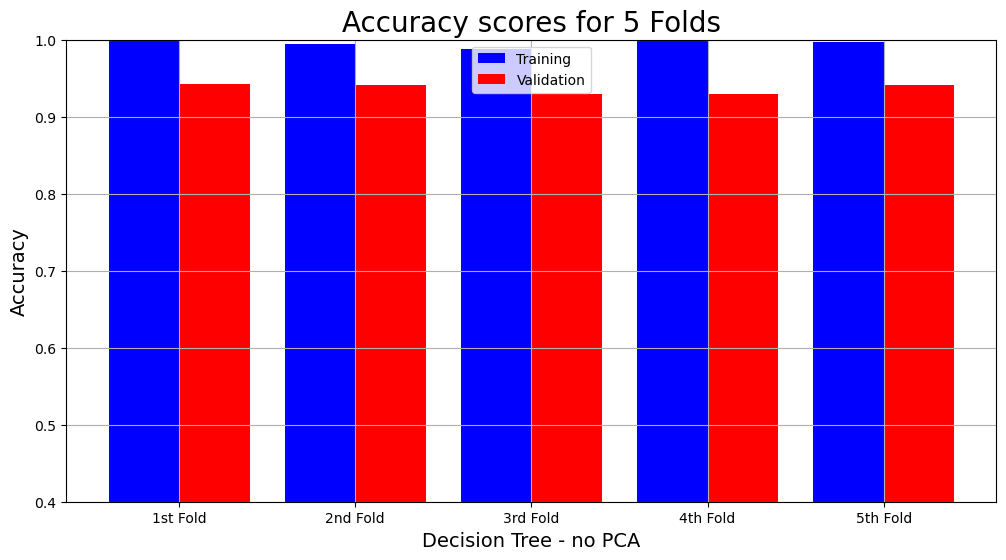

In [38]:
dt_model_cv = cross_validation(clf_GS, train_scaled_fs, train_targets)
plot_result("Decision Tree - no PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            dt_model_cv["Training Accuracy scores"],
            dt_model_cv["Validation Accuracy scores"])

# Decision Tree (PCA)

Best Criterion: gini
Best max_depth: 8
Best class weighting: balanced
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


Decision tree (PCA) accuracy: 0.93
Sensitivity:  0.9259259259259259
Specificity:  0.9325842696629213


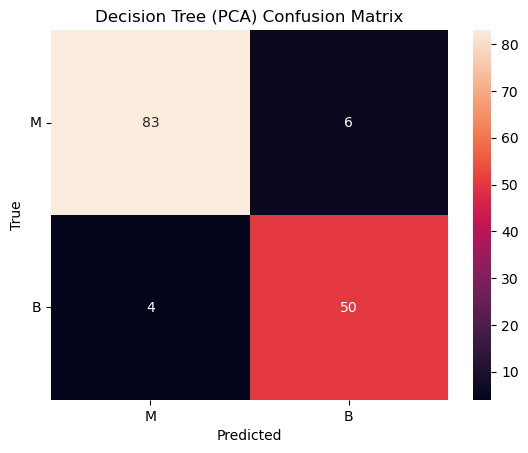

In [39]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

random_state = 0

dt = tree.DecisionTreeClassifier(random_state=random_state)

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12,14]
class_weight = [None, 'balanced']

parameters = dict(criterion=criterion,
                  max_depth=max_depth,
                  class_weight=class_weight)

clf_GS = GridSearchCV(dt, parameters)
clf_GS.fit(train_pca, train_targets)

print(f"Best Criterion: {clf_GS.best_estimator_.get_params()['criterion']}")
print(f"Best max_depth: {clf_GS.best_estimator_.get_params()['max_depth']}")
print(f"Best class weighting: {clf_GS.best_estimator_.get_params()['class_weight']}")
print(f"{clf_GS.best_estimator_.get_params()}")
print("\n")

clf_GS.score(train_pca, train_targets)
clf_GS.score(test_pca, test_targets)

test_pred = clf_GS.predict(test_pca)

results(test_pred, test_targets, "Decision tree (PCA) accuracy:", "Decision Tree (PCA) Confusion Matrix")

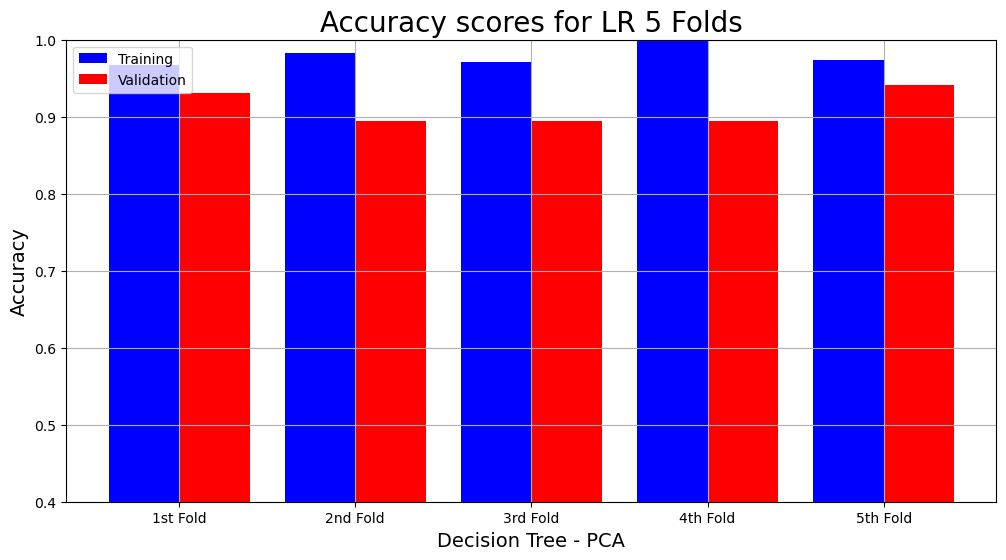

In [40]:
dt_model_cv = cross_validation(clf_GS, train_pca, train_targets)
plot_result("Decision Tree - PCA",
            "Accuracy",
            "Accuracy scores for LR 5 Folds",
            dt_model_cv["Training Accuracy scores"],
            dt_model_cv["Validation Accuracy scores"])

# Random Forest (No PCA)

Best Criterion: entropy
Best max_depth: 8
Best class weighting: balanced
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Random Forest accuracy: 0.972
Sensitivity:  0.9444444444444444
Specificity:  0.9887640449438202


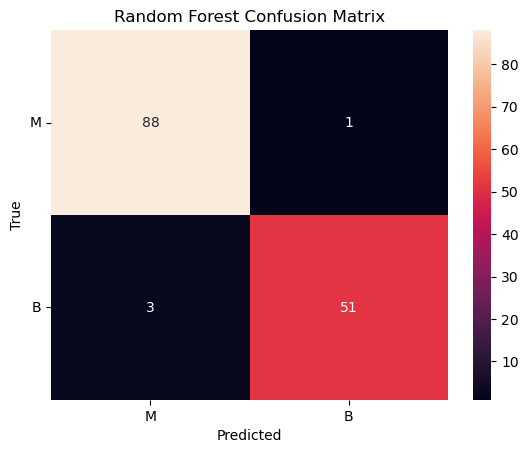

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

random_state = 0

dt = RandomForestClassifier(random_state=random_state)

criterion = ['gini', 'entropy', 'log_loss']
n_estimators = range(100, 300, 10)
max_depth = [2,4,6,8,10,12,14]
class_weight = [None, 'balanced']

parameters = dict(criterion=criterion,
                  max_depth=max_depth,
                  class_weight=class_weight)

clf_GS = GridSearchCV(dt, parameters)
clf_GS.fit(train_scaled, train_targets)

print(f"Best Criterion: {clf_GS.best_estimator_.get_params()['criterion']}")
print(f"Best max_depth: {clf_GS.best_estimator_.get_params()['max_depth']}")
print(f"Best class weighting: {clf_GS.best_estimator_.get_params()['class_weight']}")
print(f"{clf_GS.best_estimator_.get_params()}")
print("\n")

clf_GS.score(train_scaled, train_targets)
clf_GS.score(test_scaled, test_targets)

test_pred = clf_GS.predict(test_scaled)

results(test_pred, test_targets, "Random Forest accuracy:", "Random Forest Confusion Matrix")

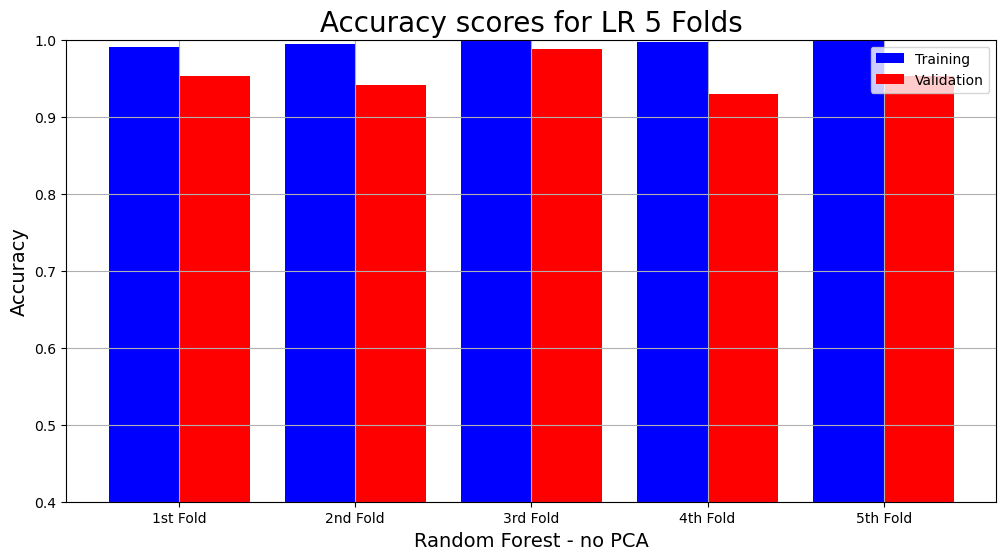

In [42]:
dt_model_cv = cross_validation(clf_GS, train_scaled, train_targets)
plot_result("Random Forest - no PCA",
            "Accuracy",
            "Accuracy scores for LR 5 Folds",
            dt_model_cv["Training Accuracy scores"],
            dt_model_cv["Validation Accuracy scores"])

# Random Forest (PCA)

Best Criterion: entropy
Best max_depth: 10
Best class weighting: balanced
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


Random Forest (PCA) accuracy: 0.958
Sensitivity:  0.9629629629629629
Specificity:  0.9550561797752809


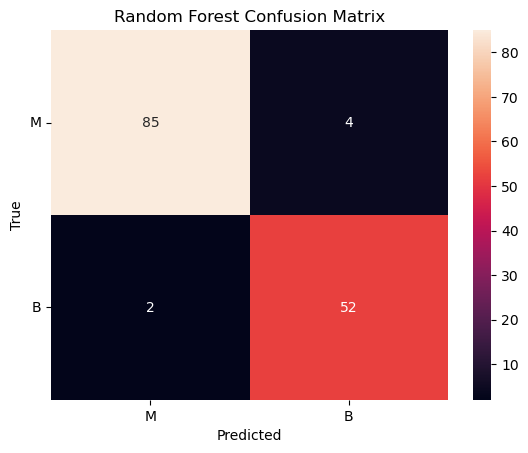

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

random_state = 0

dt = RandomForestClassifier(random_state=random_state)

criterion = ['gini', 'entropy', 'log_loss']
n_estimators = range(100, 300, 10)
max_depth = [2,4,6,8,10,12,14]
class_weight = [None, 'balanced']

parameters = dict(criterion=criterion,
                  max_depth=max_depth,
                  class_weight=class_weight)

clf_GS = GridSearchCV(dt, parameters)
clf_GS.fit(train_pca, train_targets)

print(f"Best Criterion: {clf_GS.best_estimator_.get_params()['criterion']}")
print(f"Best max_depth: {clf_GS.best_estimator_.get_params()['max_depth']}")
print(f"Best class weighting: {clf_GS.best_estimator_.get_params()['class_weight']}")
print(f"{clf_GS.best_estimator_.get_params()}")
print("\n")

clf_GS.score(train_pca, train_targets)
clf_GS.score(test_pca, test_targets)

test_pred = clf_GS.predict(test_pca)

results(test_pred, test_targets, "Random Forest (PCA) accuracy:", "Random Forest (PCA) Confusion Matrix")

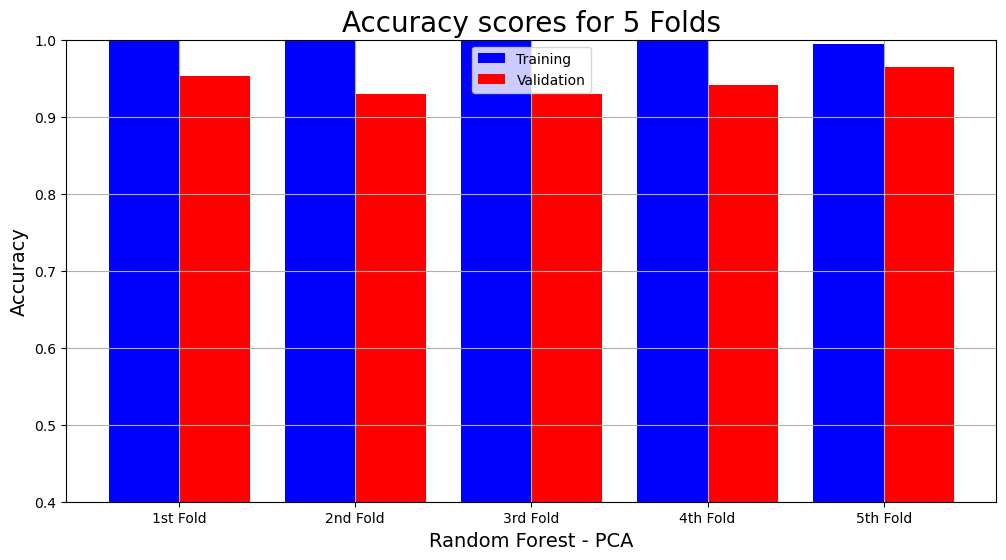

In [44]:
dt_model_cv = cross_validation(clf_GS, train_pca, train_targets)
plot_result("Random Forest - PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            dt_model_cv["Training Accuracy scores"],
            dt_model_cv["Validation Accuracy scores"])

## ANN (No PCA)

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorboard
from datetime import datetime
from packaging import version

In [46]:
from keras.wrappers.scikit_learn import KerasClassifier

def ann_model_pca():
    # Initialising the ANN
    ann = Sequential()
    # Adding the input layer and the first hidden layer
    ann.add(Dense(23, kernel_initializer='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
    ann.add(Dropout(0.1))
    # Adding the second hidden layer
    ann.add(Dense(16, kernel_initializer='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
    ann.add(Dropout(0.1))
    # Adding the output layer
    ann.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compiling the ANN
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return ann

train_ann, val_ann, train_ann_targets, val_ann_targets = train_test_split(train_scaled_fs, train_targets, test_size=0.25, random_state=42)

es = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1)

ann = KerasClassifier(build_fn=ann_model_pca,batch_size=100, epochs=150, callbacks=[es])

C:\Users\edwar\AppData\Local\Temp\ipykernel_11056\3384203893.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann = KerasClassifier(build_fn=ann_model_pca,batch_size=100, epochs=150, callbacks=[es])


Epoch 1/150
4/4 [==============================] - 1s 5ms/step - loss: 0.6927 - accuracy: 0.6559
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.6176
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.6294
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.6941
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.7412
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.8235
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.8794
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6710 - accuracy: 0.9176
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.9265
Epoch 10/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.9353
Epoch 11/150
4/4 [===========

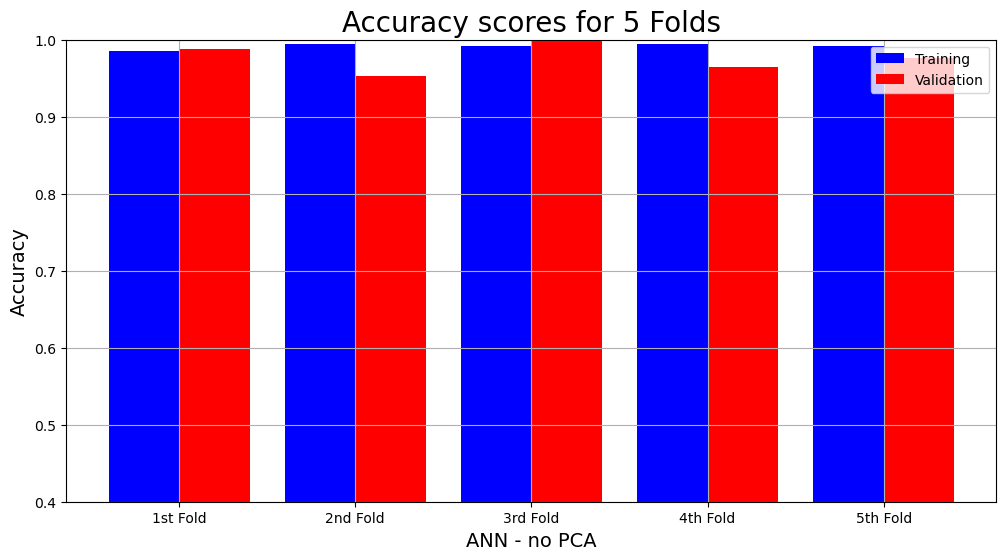

In [47]:
ann_model_cv = cross_validation(ann, train_scaled_fs, train_targets)
plot_result("ANN - no PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            ann_model_cv["Training Accuracy scores"],
            ann_model_cv["Validation Accuracy scores"])

In [48]:
# Fitting the ANN to the Training set
ann.fit(train_ann, train_ann_targets, validation_data = (val_ann, val_ann_targets), batch_size=100, epochs=150, callbacks=[es])

Epoch 1/150
4/4 [==============================] - 1s 118ms/step - loss: 0.6931 - accuracy: 0.4828 - val_loss: 0.6923 - val_accuracy: 0.6916
Epoch 2/150
4/4 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.6144 - val_loss: 0.6912 - val_accuracy: 0.6916
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 0.6915 - accuracy: 0.6144 - val_loss: 0.6900 - val_accuracy: 0.7103
Epoch 4/150
4/4 [==============================] - 0s 19ms/step - loss: 0.6902 - accuracy: 0.6552 - val_loss: 0.6883 - val_accuracy: 0.7664
Epoch 5/150
4/4 [==============================] - 0s 19ms/step - loss: 0.6884 - accuracy: 0.7398 - val_loss: 0.6859 - val_accuracy: 0.8224
Epoch 6/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6857 - accuracy: 0.8276 - val_loss: 0.6826 - val_accuracy: 0.8972
Epoch 7/150
4/4 [==============================] - 0s 19ms/step - loss: 0.6818 - accuracy: 0.8966 - val_loss: 0.6781 - val_accuracy: 0.9346
Epoch 8/150
4/4 [==

5/5 [==============================] - 0s 2ms/step
ANN accuracy: 0.972
Sensitivity:  0.9814814814814815
Specificity:  0.9662921348314607


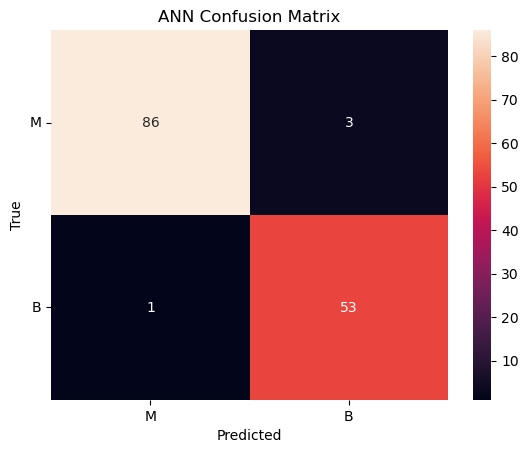

In [49]:
# Predicting the Test set results
ann_pred = ann.predict(test_scaled_fs)
ann_pred = np.round(ann_pred).astype(int)
results(ann_pred, test_targets, "ANN accuracy:", "ANN Confusion Matrix")

### ANN (With PCA)

In [50]:
from keras.wrappers.scikit_learn import KerasClassifier

def ann_model_pca():
    # Initialising the ANN
    pca_ann = Sequential()
    # Adding the input layer and the first hidden layer
    pca_ann.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
    pca_ann.add(Dropout(0.1))
    # Adding the second hidden layer
    pca_ann.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
    pca_ann.add(Dropout(0.1))
    # Adding the output layer
    pca_ann.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compiling the ANN
    pca_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return pca_ann

train_pca_ann, val_pca_ann, train_pca_targets, val_pca_targets = train_test_split(train_pca, train_targets, test_size=0.25, random_state=42)

es_pca = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1)

pca_ann = KerasClassifier(build_fn=ann_model_pca,batch_size=100, epochs=150, callbacks=[es_pca])

C:\Users\edwar\AppData\Local\Temp\ipykernel_11056\2106049763.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pca_ann = KerasClassifier(build_fn=ann_model_pca,batch_size=100, epochs=150, callbacks=[es_pca])


Epoch 1/150
4/4 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.5735
Epoch 2/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.6118
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.6118
Epoch 4/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.6118
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.6118
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.6118
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.6118
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.6118
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.6118
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.6118
Epoch 11/150
4/4 [===========

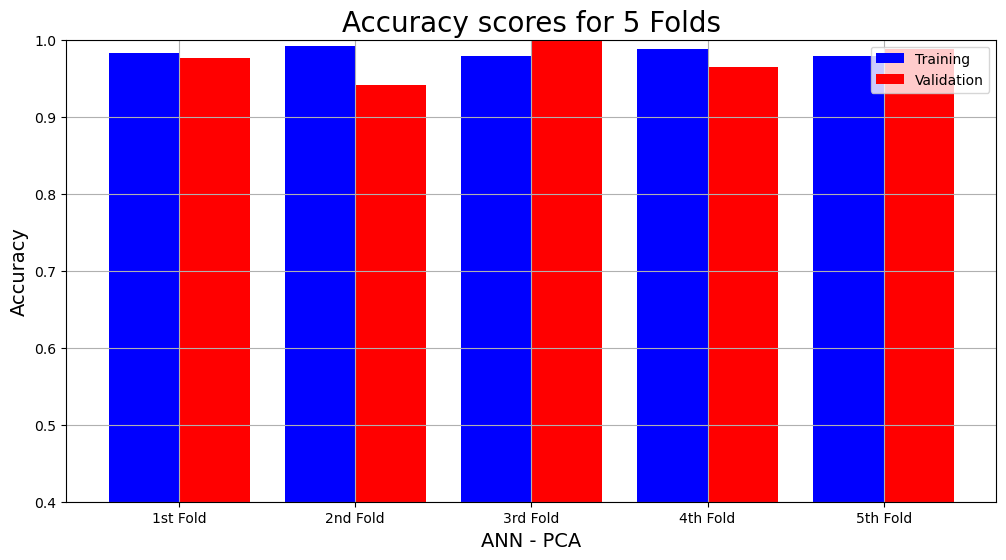

In [51]:
ann_pca_model_cv = cross_validation(pca_ann, train_pca, train_targets)
plot_result("ANN - PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            ann_pca_model_cv["Training Accuracy scores"],
            ann_pca_model_cv["Validation Accuracy scores"])

In [52]:
# Fitting the ANN to the Training set
pca_ann.fit(train_pca_ann, train_pca_targets, validation_data = (val_pca_ann, val_pca_targets), batch_size=100, epochs=150, callbacks=[es_pca])

Epoch 1/150
4/4 [==============================] - 1s 104ms/step - loss: 0.6930 - accuracy: 0.5611 - val_loss: 0.6923 - val_accuracy: 0.6916
Epoch 2/150
4/4 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.6082 - val_loss: 0.6914 - val_accuracy: 0.6916
Epoch 3/150
4/4 [==============================] - 0s 18ms/step - loss: 0.6918 - accuracy: 0.6082 - val_loss: 0.6905 - val_accuracy: 0.6916
Epoch 4/150
4/4 [==============================] - 0s 19ms/step - loss: 0.6911 - accuracy: 0.6082 - val_loss: 0.6895 - val_accuracy: 0.6916
Epoch 5/150
4/4 [==============================] - 0s 19ms/step - loss: 0.6903 - accuracy: 0.6113 - val_loss: 0.6884 - val_accuracy: 0.7009
Epoch 6/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6893 - accuracy: 0.6144 - val_loss: 0.6871 - val_accuracy: 0.7009
Epoch 7/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6881 - accuracy: 0.6238 - val_loss: 0.6856 - val_accuracy: 0.7103
Epoch 8/150
4/4 [==

5/5 [==============================] - 0s 2ms/step
ANN PCA accuracy: 0.979
Sensitivity:  0.9814814814814815
Specificity:  0.9775280898876404


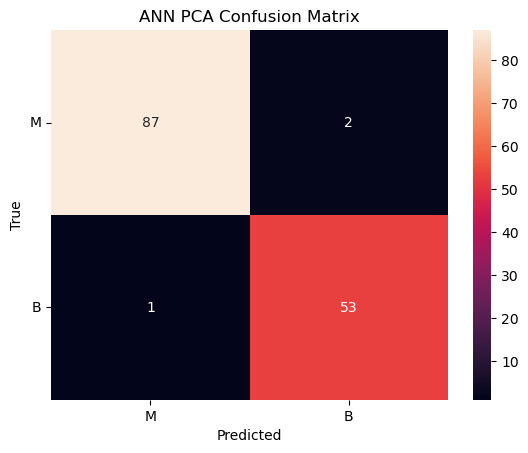

In [53]:
# Predicting the Test set results
pca_ann_pred = pca_ann.predict(test_pca)
pca_ann_pred = np.round(pca_ann_pred).astype(int)

results(pca_ann_pred, test_targets, "ANN PCA accuracy:", "ANN PCA Confusion Matrix")

# XGBoost

In [62]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

_ = grid_cv.fit(train_scaled_fs, train_targets)

grid_cv.best_score_

grid_cv.best_params_

[02:22:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 1,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [63]:
param_grid["reg_lambda"] = [1]
param_grid["colsample_bytree"] = [0.5]
param_grid["subsample"] = [0.8]

param_grid["max_depth"] = [9, 15, 20]
param_grid["gamma"] = [3, 5, 7]
param_grid["scale_pos_weight"] = [7, 9, 12]
param_grid["learning_rate"] = [0.1, 0.25, 0.5]

grid_cv2 = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

_ = grid_cv2.fit(train_scaled_fs, train_targets)

print(grid_cv2.best_score_)

print(grid_cv2.best_params_)

[02:22:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9884387832819038
{'colsample_bytree': 0.5, 'gamma': 3, 'learning_rate': 0.1, 'max_depth': 9, 'reg_lambda': 1, 'scale_pos_weight': 7, 'subsample': 0.8}


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


grid_cv performs better than grid_cv2

[02:22:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy: 0.965
Sensitivity:  0.9814814814814815
Specificity:  0.9550561797752809
None


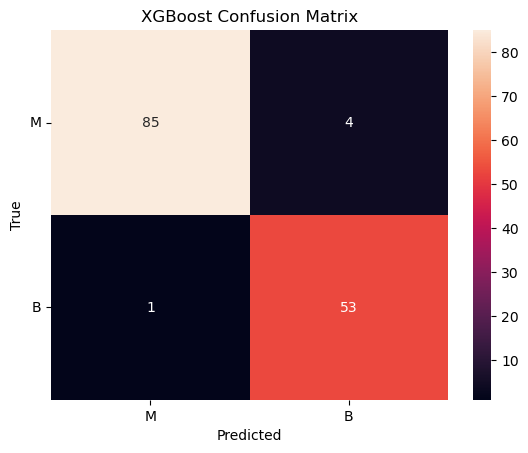

In [64]:
final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic"
)

_ = final_cl.fit(train_scaled_fs, train_targets)

test_pred = final_cl.predict(test_scaled_fs)

print(results(test_pred, test_targets, "XGBoost accuracy:", "XGBoost Confusion Matrix"))

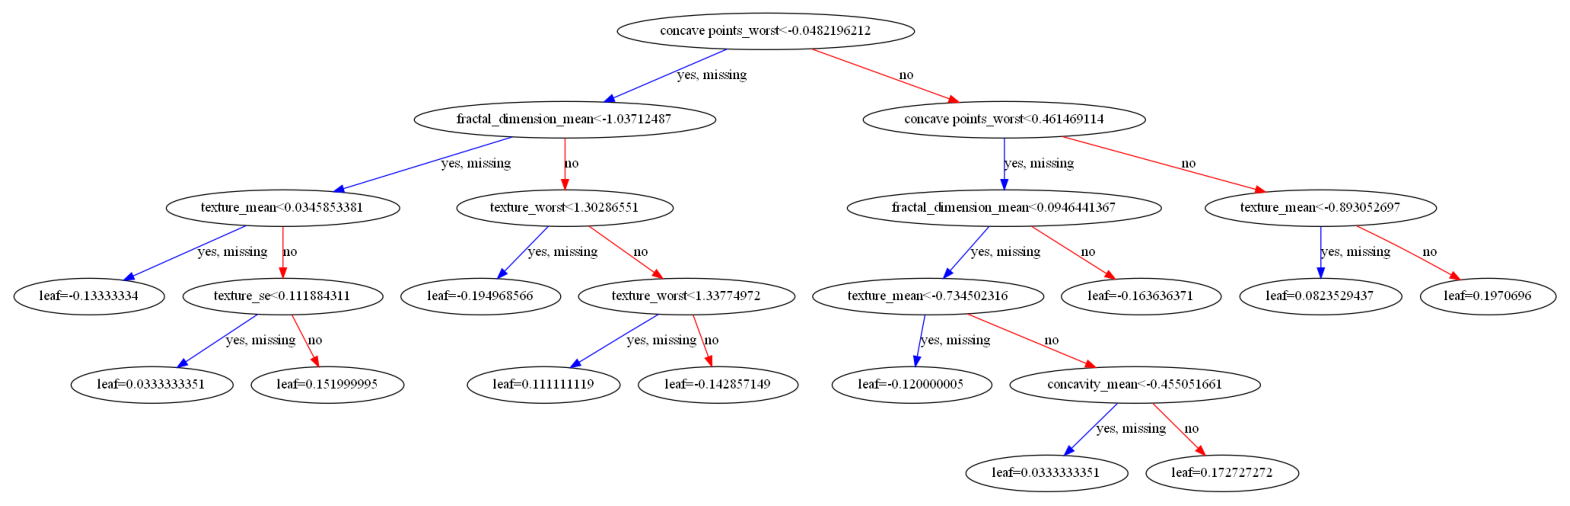

In [55]:
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(20,25))
plot_tree(final_cl, ax=ax)
plt.show()

c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[02:22:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:22:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[02:22:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:22:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[02:22:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


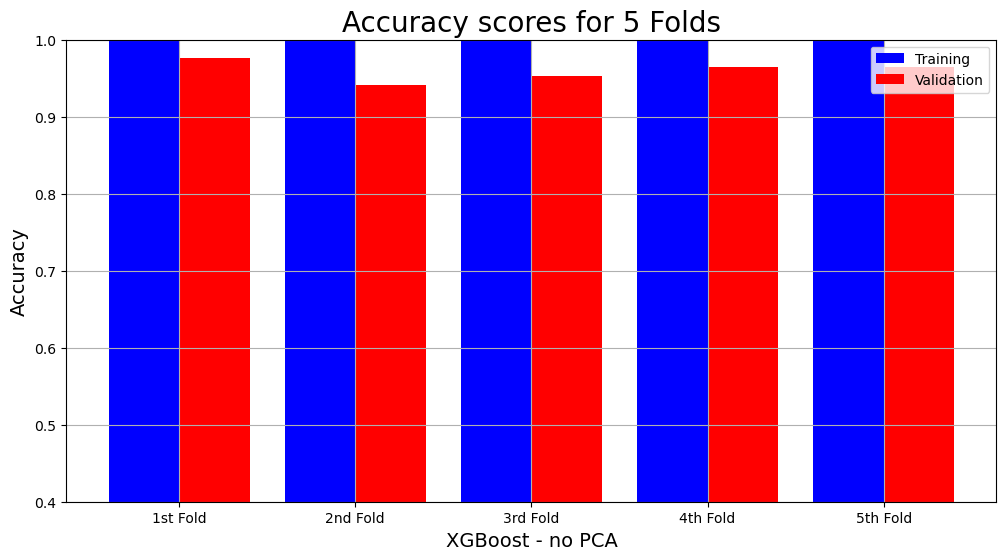

In [65]:
xg_model_cv = cross_validation(final_cl, train_scaled_fs, train_targets)
plot_result("XGBoost - no PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            xg_model_cv["Training Accuracy scores"],
            xg_model_cv["Validation Accuracy scores"])

# XGBoost (PCA)

In [66]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

_ = grid_cv.fit(train_pca, train_targets)

grid_cv.best_score_

grid_cv.best_params_

[02:24:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 1,
 'scale_pos_weight': 5,
 'subsample': 0.8}

c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:57:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost PCA accuracy: 0.958
Sensitivity:  0.9629629629629629
Specificity:  0.9550561797752809


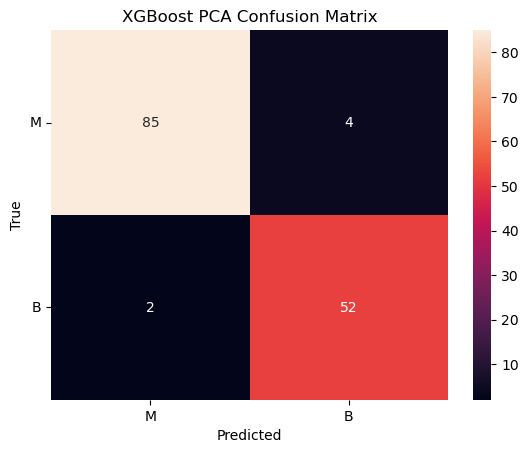

In [83]:
final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic"
)

_ = final_cl.fit(train_pca, train_targets)

test_pred = final_cl.predict(test_pca)

results(test_pred, test_targets, "XGBoost PCA accuracy:", "XGBoost PCA Confusion Matrix")

c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[02:42:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:42:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[02:42:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:42:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:42:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


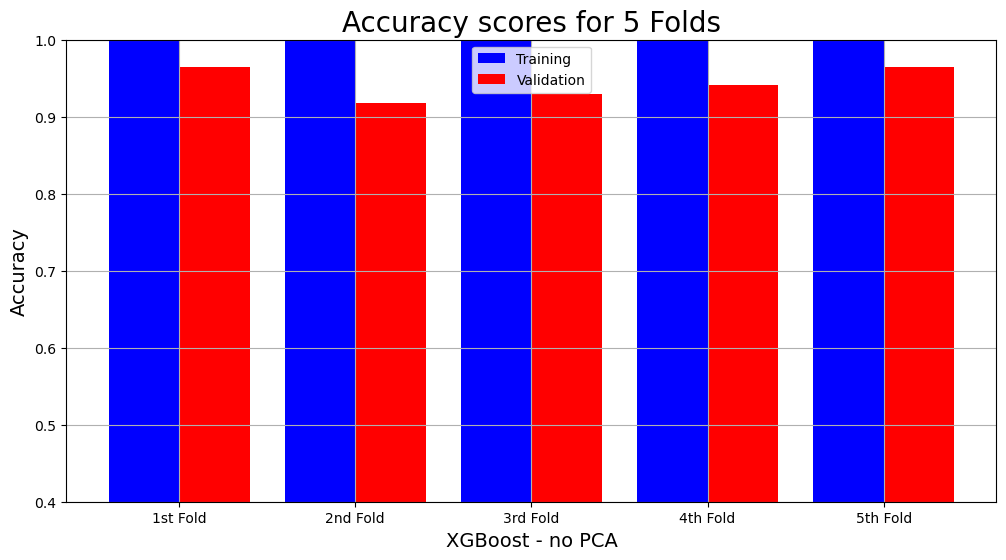

In [71]:
xg_pca_model_cv = cross_validation(final_cl, train_pca, train_targets)
plot_result("XGBoost - no PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            xg_pca_model_cv["Training Accuracy scores"],
            xg_pca_model_cv["Validation Accuracy scores"])

# Ensemble Method

Use stacking to combine the different models

C:\Users\edwar\AppData\Local\Temp\ipykernel_11056\3008419429.py:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_clf = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32)


Epoch 1/15
14/14 [==============================] - 1s 4ms/step - loss: 0.6909 - accuracy: 0.7840
Epoch 2/15
14/14 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.9038
Epoch 3/15
14/14 [==============================] - 0s 10ms/step - loss: 0.6526 - accuracy: 0.9366
Epoch 4/15
14/14 [==============================] - 0s 4ms/step - loss: 0.5960 - accuracy: 0.9319
Epoch 5/15
14/14 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.9366
Epoch 6/15
14/14 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.9507
Epoch 7/15
14/14 [==============================] - 0s 3ms/step - loss: 0.3014 - accuracy: 0.9507
Epoch 8/15
14/14 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9577
Epoch 9/15
14/14 [==============================] - 0s 3ms/step - loss: 0.1798 - accuracy: 0.9624
Epoch 10/15
14/14 [==============================] - 0s 3ms/step - loss: 0.1458 - accuracy: 0.9695
Epoch 11/15
14/14 

c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Epoch 1/15
11/11 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.6294
Epoch 2/15
11/11 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6294
Epoch 3/15
11/11 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6294
Epoch 4/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6412
Epoch 5/15
11/11 [==============================] - 0s 4ms/step - loss: 0.5775 - accuracy: 0.7765
Epoch 6/15
11/11 [==============================] - 0s 4ms/step - loss: 0.5076 - accuracy: 0.8853
Epoch 7/15
11/11 [==============================] - 0s 4ms/step - loss: 0.4394 - accuracy: 0.9353
Epoch 8/15
11/11 [==============================] - 0s 4ms/step - loss: 0.3835 - accuracy: 0.9529
Epoch 9/15
11/11 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.9588
Epoch 10/15
11/11 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.9647
Epoch 11/15
11/11 [

c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[02:46:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:46:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:46:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:46:31] WARNING:

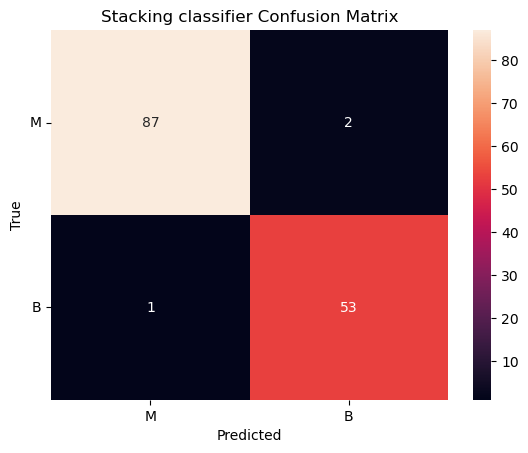

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import StackingClassifier


def create_model():
    model = Sequential()
    model.add(Dense(23, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

ANN_clf = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32)
ANN_clf._estimator_type = "classifier"

RF_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0, criterion='entropy')
DT_clf = DecisionTreeClassifier(criterion='entropy', max_depth=8, class_weight=None, random_state=0)
LR_clf = LogisticRegression(C=1, penalty='l2')
XG_clf = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.5, gamma=3, learning_rate=0.1, max_depth=9, reg_lambda=1, scale_pos_weight=7, subsample=0.8)

estimators = [('RF', RF_clf), ('DT', DT_clf), ('LR', LR_clf), ('ANN', ANN_clf), ('XGB', XG_clf)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


clf.fit(train_scaled_fs, train_targets)
print(f"Stacking model accuracy (Train): {clf.score(train_scaled_fs, train_targets)}")

test_pred = clf.predict(test_scaled_fs)
results(test_pred, test_targets, "Stacking classifier accuracy (Test):", "Stacking classifier Confusion Matrix")

Epoch 1/15
11/11 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy: 0.6265
Epoch 2/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.6294
Epoch 3/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.6353
Epoch 4/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6824
Epoch 5/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.8029
Epoch 6/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6367 - accuracy: 0.9147
Epoch 7/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6030 - accuracy: 0.9412
Epoch 8/15
11/11 [==============================] - 0s 4ms/step - loss: 0.5555 - accuracy: 0.9412
Epoch 9/15
11/11 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.9412
Epoch 10/15
11/11 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.9412
Epoch 11/15
11/11 [

c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[19:33:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[19:33:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:33:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


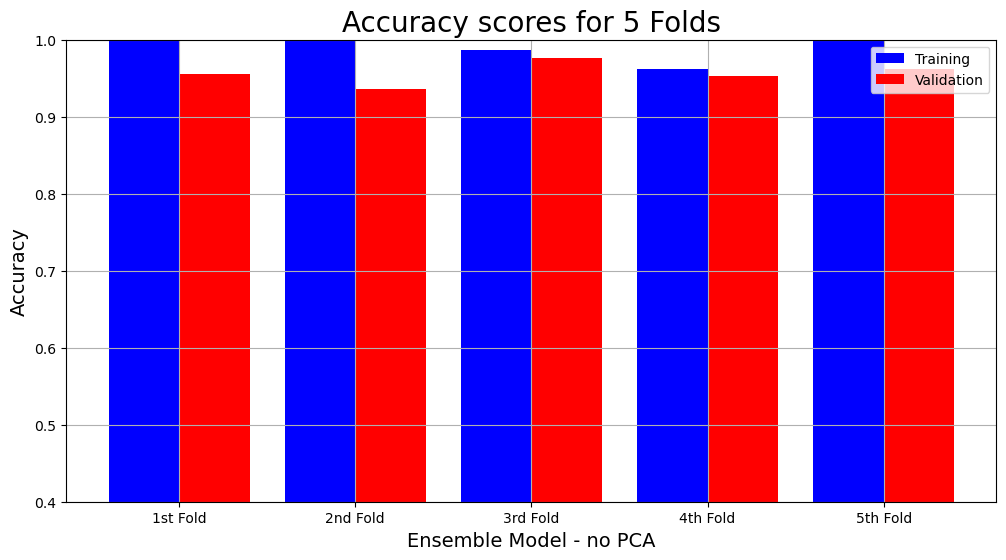

In [84]:
models = [RF_clf,DT_clf, LR_clf, ANN_clf,  XG_clf]
 
ensemble_model_cv = []
 
for x in models:
    ensemble_model_cv.append(cross_validation(x, train_scaled_fs, train_targets))
 
ensemble_avg_train = []
ensemble_avg_val = []
 
for x in range(len(ensemble_model_cv)):
    ensemble_avg_train.append(ensemble_model_cv[x]["Training Accuracy scores"])
    ensemble_avg_val.append(ensemble_model_cv[x]["Validation Accuracy scores"])
 
ensemble_avg_train = np.mean(ensemble_avg_train, axis=1)
ensemble_avg_val = np.mean(ensemble_avg_val, axis=1)
 
plot_result("Ensemble Model - no PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            ensemble_avg_train,
            ensemble_avg_val)


## Stacking with PCA

C:\Users\edwar\AppData\Local\Temp\ipykernel_11056\3471025782.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ANN_clf = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32)


Epoch 1/15
14/14 [==============================] - 1s 3ms/step - loss: 0.6921 - accuracy: 0.6291
Epoch 2/15
14/14 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.6291
Epoch 3/15
14/14 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.6291
Epoch 4/15
14/14 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6291
Epoch 5/15
14/14 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.6315
Epoch 6/15
14/14 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.6432
Epoch 7/15
14/14 [==============================] - 0s 3ms/step - loss: 0.5832 - accuracy: 0.7324
Epoch 8/15
14/14 [==============================] - 0s 4ms/step - loss: 0.5305 - accuracy: 0.8498
Epoch 9/15
14/14 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.9155
Epoch 10/15
14/14 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.9225
Epoch 11/15
14/14 [

c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Epoch 1/15
11/11 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5971
Epoch 2/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.6294
Epoch 3/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.6294
Epoch 4/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.6382
Epoch 5/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6471
Epoch 6/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.7176
Epoch 7/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.8382
Epoch 8/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.8824
Epoch 9/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6016 - accuracy: 0.9412
Epoch 10/15
11/11 [==============================] - 0s 8ms/step - loss: 0.5677 - accuracy: 0.9412
Epoch 11/15
11/11 [

c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:37:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
14/14 [============

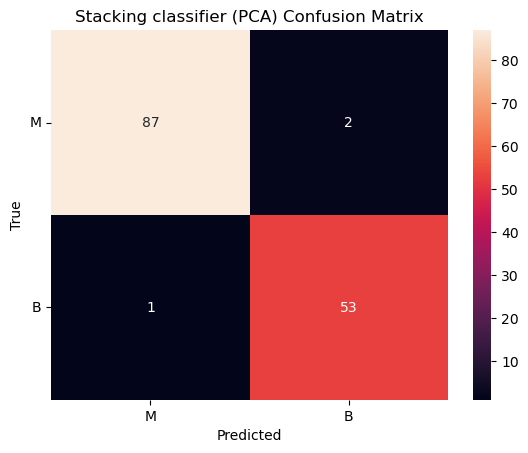

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import StackingClassifier


def create_model():
    model = Sequential()
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

ANN_clf = KerasClassifier(build_fn=create_model, epochs=15, batch_size=32)
ANN_clf._estimator_type = "classifier"

RF_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0, criterion='entropy')
DT_clf = DecisionTreeClassifier(criterion='entropy', max_depth=8, class_weight=None, random_state=0)
LR_clf = LogisticRegression(C=1, penalty='l2')
XG_clf = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, reg_lambda=1, scale_pos_weight=5, subsample=0.8)

estimators = [('RF', RF_clf), ('DT', DT_clf), ('LR', LR_clf), ('ANN', ANN_clf), ('XGB', XG_clf)]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

clf.fit(train_pca, train_targets)
print(f"Stacking model accuracy (Train): {clf.score(train_pca, train_targets)}")

test_pred = clf.predict(test_pca)
results(test_pred, test_targets, "Stacking classifier accuracy (Test):", "Stacking classifier (PCA) Confusion Matrix")

Epoch 1/15
11/11 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5647
Epoch 2/15
11/11 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.6294
Epoch 3/15
11/11 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.6294
Epoch 4/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.6294
Epoch 5/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6294
Epoch 6/15
11/11 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.6294
Epoch 7/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.6588
Epoch 8/15
11/11 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.7235
Epoch 9/15
11/11 [==============================] - 0s 7ms/step - loss: 0.6095 - accuracy: 0.8471
Epoch 10/15
11/11 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.8941
Epoch 11/15
11/11 [

c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[19:36:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the followi

[19:36:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\edwar\anaconda3\envs\tensor_env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


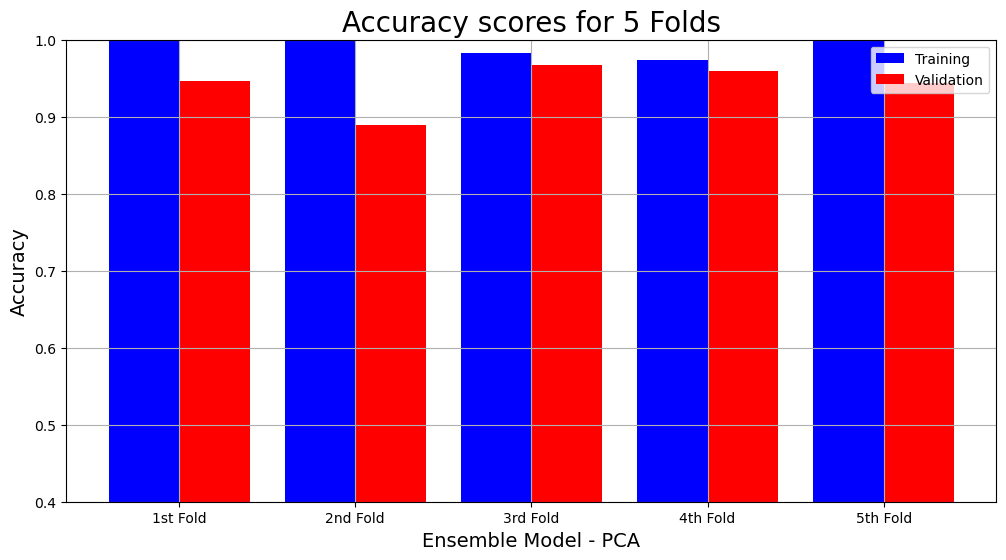

In [87]:
models = [RF_clf,DT_clf, LR_clf, ANN_clf,  XG_clf]
 
ensemble_model_cv = []
 
for x in models:
    ensemble_model_cv.append(cross_validation(x, train_pca, train_targets))
 
 
ensemble_avg_train = []
ensemble_avg_val = []
 
for x in range(len(ensemble_model_cv)):
    ensemble_avg_train.append(ensemble_model_cv[x]["Training Accuracy scores"])
    ensemble_avg_val.append(ensemble_model_cv[x]["Validation Accuracy scores"])
 
ensemble_avg_train = np.mean(ensemble_avg_train, axis=1)
ensemble_avg_val = np.mean(ensemble_avg_val, axis=1)
 
plot_result("Ensemble Model - PCA",
            "Accuracy",
            "Accuracy scores for 5 Folds",
            ensemble_avg_train,
            ensemble_avg_val)